<a href="https://colab.research.google.com/github/rahatwads/Data-Science/blob/main/ModelInterpretability_Shivani002734520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Interpretability**

MIT License Copyright (c) 2024 rahatwads Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software. THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


About Dataset: https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset

# Abstract:
This data science assignment aims to develop and interpret predictive models for heart disease risk prediction using a dataset sourced from Kaggle. The assignment comprises four main steps. Firstly, a linear regression model is fitted to the data to predict the likelihood of heart disease, with regression coefficients interpreted to understand the impact of various features on the outcome. Secondly, a tree-based model is employed, and nodes are interpreted to provide insights into the decision-making process of the model. Thirdly, automated machine learning (AutoML) techniques are utilized to identify the best-performing model for heart disease prediction. Lastly, SHAP (SHapley Additive exPlanations) analysis is conducted on the models from steps 1, 2, and 3 to interpret their predictions. SHAP values are interpreted to understand the contribution of each feature to the model's predictions and compared with other model interpretability methods. This comprehensive approach allows for a thorough understanding of the predictive models' behavior and provides valuable insights into the risk factors associated with heart disease.

# **LOADING THE DATASET AND DOING ANALYSIS ON THE DATA**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import files

# Upload kaggle.json
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [3]:
!pip install kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d alphiree/cardiovascular-diseases-risk-prediction-dataset


  0% 0.00/4.87M [00:00<?, ?B/s]
100% 4.87M/4.87M [00:00<00:00, 59.4MB/s]


In [6]:
!unzip cardiovascular-diseases-risk-prediction-dataset.zip


Archive:  cardiovascular-diseases-risk-prediction-dataset.zip
  inflating: CVD_cleaned.csv         


In [7]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=1a68e8a2220b17c7b64c37419236b6aaaeef1d211877af06f86486e6734bc7c0
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [8]:
!ls

cardiovascular-diseases-risk-prediction-dataset.zip  CVD_cleaned.csv  kaggle.json  sample_data


In [9]:
file_path = "/content/CVD_cleaned.csv"

In [10]:
df = pd.read_csv(file_path)

In [11]:
df.head()

General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  14.54             Yes                  0.0   
1        165.0        77.11  28.29              No                  0.0   
2        163.0        88.45  33.47              No                  4.0   
3        180.0        93.44  28.73              No                  0.0   
4        191.0        88.45  24.37             Yes                  0.0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  
0               30.0                          16.0                     12.0  
1               30.0                           0.0                      4.0  
2               12.0                           3.0                     16.0  
3               30.0                          30.0                      8.0  
4                8.0                           4.0                      0.0

In [12]:
df.dtypes
# to check missing values
missing_values = df.isnull().sum()
print(missing_values)
#Converting in 1-0 coding for better analysis
df['Heart_Disease'] = df['Heart_Disease'].map({'No': 0, 'Yes': 1})
df['General_Health'] = df['General_Health'].map({'Poor': 1, 'Fair': 2,'Good': 3,'Very Good': 4,'Excellent': 5})
df['Exercise'] = df['Exercise'].map({'No': 0, 'Yes': 1})
df['Skin_Cancer'] = df['Skin_Cancer'].map({'No': 0, 'Yes': 1})
df['Other_Cancer'] = df['Other_Cancer'].map({'No': 0, 'Yes': 1})
df['Arthritis'] = df['Arthritis'].map({'No': 0, 'Yes': 1})
df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})
df['Depression'] = df['Depression'].map({'No': 0, 'Yes': 1})
df['Smoking_History'] = df['Smoking_History'].map({'No': 0, 'Yes': 1})
df['Age_Category'] = df['Age_Category'].astype("category").cat.codes
df['Checkup'] = df['Checkup'].astype("category").cat.codes
df['Diabetes'] = df['Diabetes'].astype("category").cat.codes
df.info()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  int64  
 1   Checkup                       308854 non-null

In [13]:
df.describe()

General_Health        Checkup       Exercise  Heart_Disease  \
count   308854.000000  308854.000000  308854.000000  308854.000000   
mean         3.530448       3.515069       0.775062       0.080850   
std          1.031224       1.019576       0.417542       0.272606   
min          1.000000       0.000000       0.000000       0.000000   
25%          3.000000       4.000000       1.000000       0.000000   
50%          4.000000       4.000000       1.000000       0.000000   
75%          4.000000       4.000000       1.000000       0.000000   
max          5.000000       4.000000       1.000000       1.000000   

         Skin_Cancer   Other_Cancer     Depression       Diabetes  \
count  308854.000000  308854.000000  308854.000000  308854.000000   
mean        0.097114       0.096738       0.200422       0.308159   
std         0.296113       0.295602       0.400316       0.724383   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       3.000000   

           Arthritis            Sex   Age_Category    Height_(cm)  \
count  308854.000000  308854.000000  308854.000000  308854.000000   
mean        0.327245       0.518679       6.535888     170.615249   
std         0.469208       0.499652       3.523526      10.658026   
min         0.000000       0.000000       0.000000      91.000000   
25%         0.000000       0.000000       4.000000     163.000000   
50%         0.000000       1.000000       7.000000     170.000000   
75%         1.000000       1.000000       9.000000     178.000000   
max         1.000000       1.000000      12.000000     241.000000   

         Weight_(kg)            BMI  Smoking_History  Alcohol_Consumption  \
count  308854.000000  308854.000000    308854.000000        308854.000000   
mean       83.588655      28.626211         0.405577             5.096366   
std        21.343210       6.522323         0.491004             8.199763   
min        24.950000      12.020000         0.000000             0.000000   
25%        68.040000      24.210000         0.000000             0.000000   
50%        81.650000      27.440000         0.000000             1.000000   
75%        95.250000      31.850000         1.000000             6.000000   
max       293.020000      99.330000         1.000000            30.000000   

       Fruit_Consumption  Green_Vegetables_Consumption  \
count      308854.000000                 308854.000000   
mean           29.835200                     15.110441   
std            24.875735                     14.926238   
min             0.000000                      0.000000   
25%            12.000000                      4.000000   
50%            30.000000                     12.000000   
75%            30.000000                     20.000000   
max           120.000000                    128.000000   

       FriedPotato_Consumption  
count            308854.000000  
mean                  6.296616  
std                   8.582954  
min                   0.000000  
25%                   2.000000  
50%                   4.000000  
75%                   8.000000  
max                 128.000000

In [14]:
df.corr()

General_Health   Checkup  Exercise  \
General_Health                      1.000000 -0.088348  0.276096   
Checkup                            -0.088348  1.000000 -0.029750   
Exercise                            0.276096 -0.029750  1.000000   
Heart_Disease                      -0.232503  0.083480 -0.096347   
Skin_Cancer                        -0.047113  0.079285 -0.003986   
Other_Cancer                       -0.145640  0.086747 -0.054388   
Depression                         -0.207587  0.035632 -0.084729   
Diabetes                           -0.262828  0.127812 -0.136618   
Arthritis                          -0.265957  0.150166 -0.124813   
Sex                                -0.018969  0.100058 -0.059344   
Age_Category                       -0.167344  0.223067 -0.122345   
Height_(cm)                         0.066942 -0.088958  0.091618   
Weight_(kg)                        -0.184238  0.012007 -0.090144   
BMI                                -0.246499  0.060868 -0.155756   
Smoking_History                    -0.167608 -0.010145 -0.093295   
Alcohol_Consumption                 0.118227 -0.046676  0.094959   
Fruit_Consumption                   0.102615  0.039310  0.136787   
Green_Vegetables_Consumption        0.119776  0.034934  0.125002   
FriedPotato_Consumption            -0.031859 -0.055723 -0.036930   

                              Heart_Disease  Skin_Cancer  Other_Cancer  \
General_Health                    -0.232503    -0.047113     -0.145640   
Checkup                            0.083480     0.079285      0.086747   
Exercise                          -0.096347    -0.003986     -0.054388   
Heart_Disease                      1.000000     0.090848      0.092387   
Skin_Cancer                        0.090848     1.000000      0.150824   
Other_Cancer                       0.092387     0.150824      1.000000   
Depression                         0.032526    -0.013014      0.015892   
Diabetes                           0.166241     0.032968      0.063898   
Arthritis                          0.153913     0.136178      0.129362   
Sex                               -0.072595    -0.009678      0.042044   
Age_Category                       0.229011     0.272074      0.234459   
Height_(cm)                        0.015780     0.006812     -0.043459   
Weight_(kg)                        0.045875    -0.028954     -0.021132   
BMI                                0.042666    -0.037619      0.001047   
Smoking_History                    0.107797     0.032828      0.053431   
Alcohol_Consumption               -0.036569     0.042764     -0.008663   
Fruit_Consumption                 -0.020055     0.024123      0.007974   
Green_Vegetables_Consumption      -0.024043     0.012871     -0.003237   
FriedPotato_Consumption           -0.009227    -0.038919     -0.033298   

                              Depression  Diabetes  Arthritis       Sex  \
General_Health                 -0.207587 -0.262828  -0.265957 -0.018969   
Checkup                         0.035632  0.127812   0.150166  0.100058   
Exercise                       -0.084729 -0.136618  -0.124813 -0.059344   
Heart_Disease                   0.032526  0.166241   0.153913 -0.072595   
Skin_Cancer                    -0.013014  0.032968   0.136178 -0.009678   
Other_Cancer                    0.015892  0.063898   0.129362  0.042044   
Depression                      1.000000  0.053155   0.121598  0.141450   
Diabetes                        0.053155  1.000000   0.133890  0.013143   
Arthritis                       0.121598  0.133890   1.000000  0.100053   
Sex                             0.141450  0.013143   0.100053  1.000000   
Age_Category                   -0.103169  0.192792   0.370997  0.060232   
Height_(cm)                    -0.091318 -0.043098  -0.097789 -0.698167   
Weight_(kg)                     0.047936  0.158219   0.074104 -0.354019   
BMI                             0.109597  0.205326   0.137964 -0.010989   
Smoking_History                 0.100275  0.053780   0.123196 -

In [15]:
#Rearraging the target varaible
column_to_move = df.pop("Heart_Disease")
df.insert(18, "Heart_Disease", column_to_move)

<Axes: >

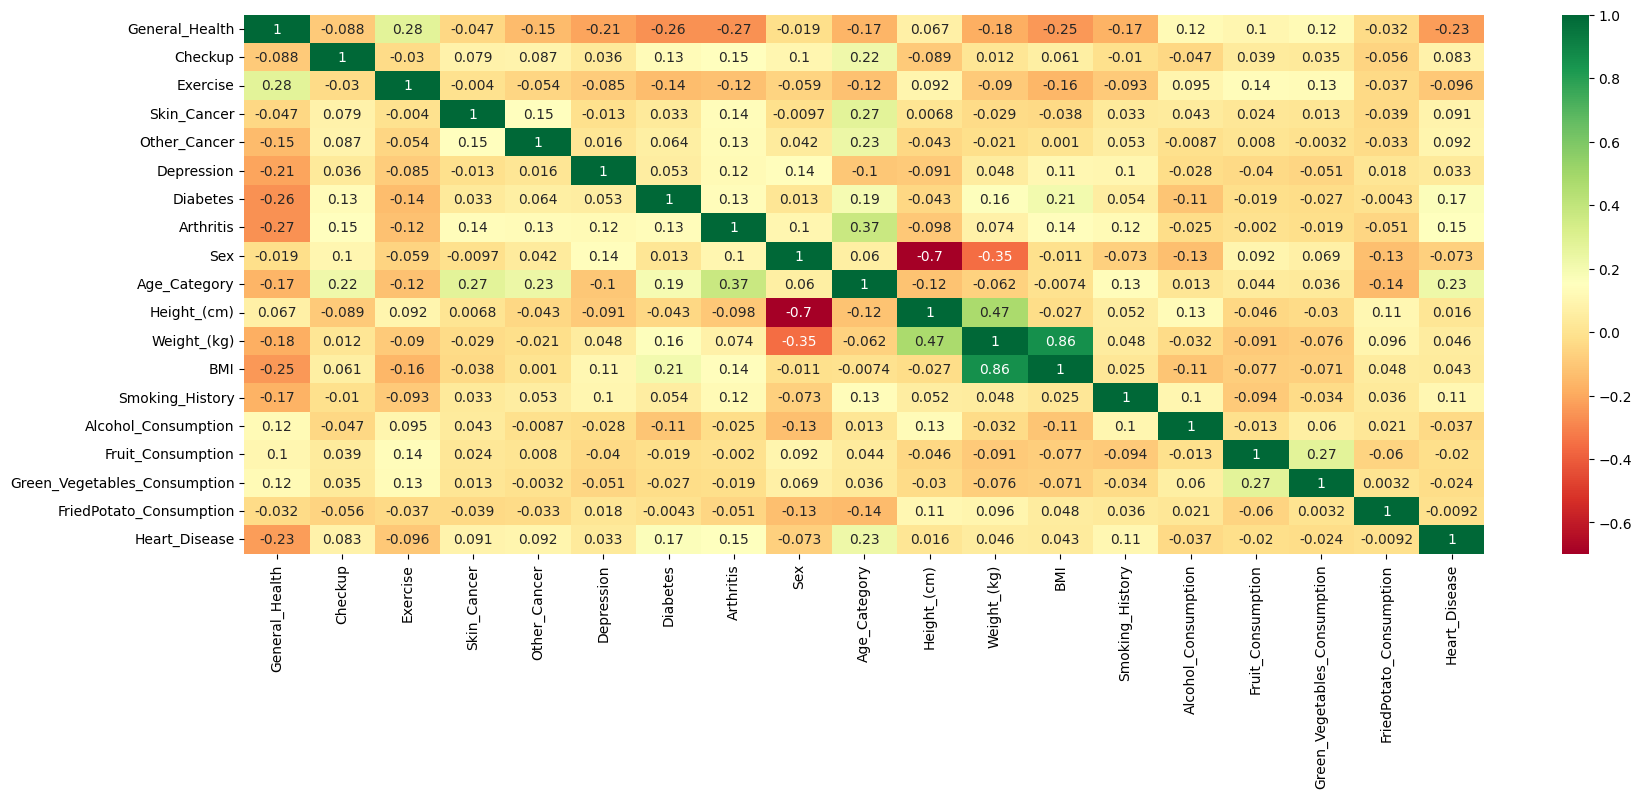

In [16]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

# **SPLITTING IN THE DATA IN TRAIN AND TEST**

In [17]:
X = df.drop(columns=['Heart_Disease'])
y = df['Heart_Disease']

In [18]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Text(0.5, 1.0, 'Variable Correlation')

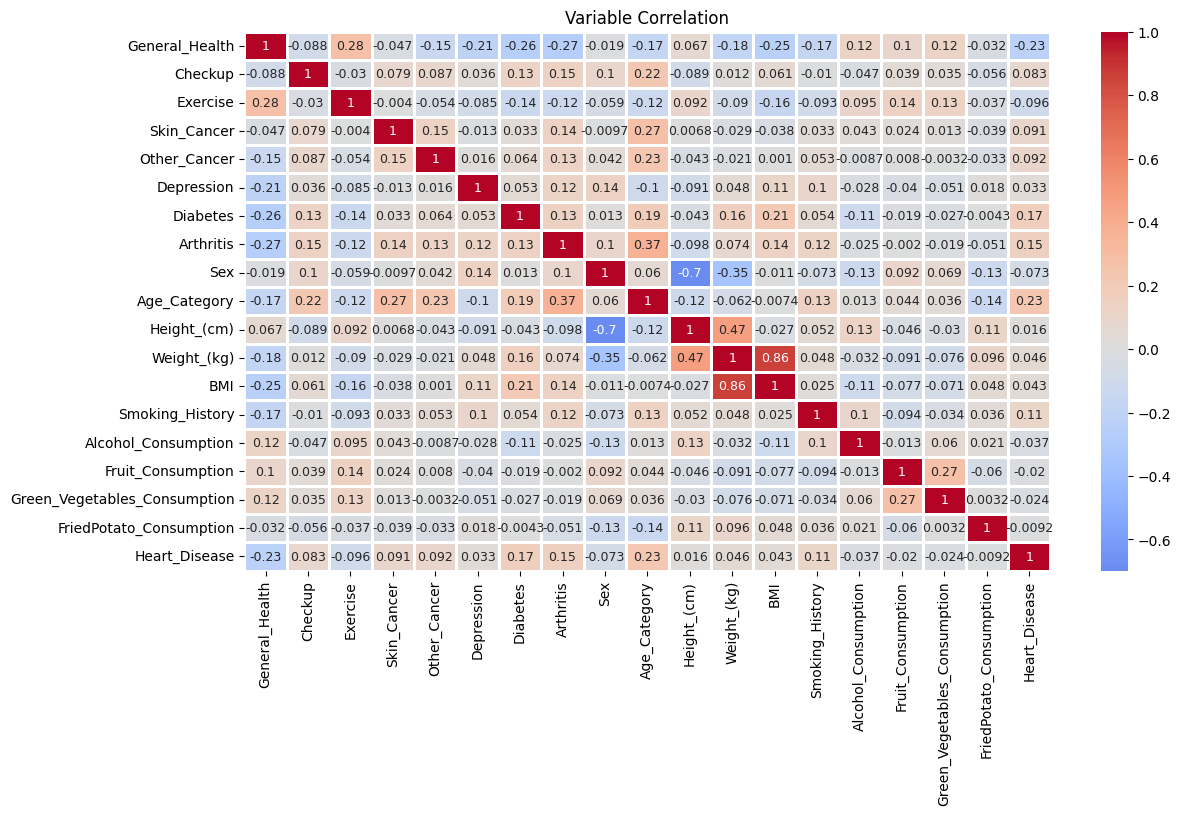

In [19]:
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(13,7))

sns.heatmap(df.corr(),center=0, linewidths=0.9,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

* Positive correlations (warmer colors) indicate variables that tend to increase or decrease together, while negative correlations (cooler colors) show variables that move in opposite directions.
* High correlations may suggest redundant information (multicollinearity), which can impact model interpretation.

# **1. FIT LOGISTIC REGRESSION MODEL**

In [20]:
# Fit a logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
# Interpret regression coefficients
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": lr_model.coef_[0]})
print(coefficients)



                         Feature  Coefficient
0                 General_Health    -0.581754
1                        Checkup     0.192648
2                       Exercise    -0.007961
3                    Skin_Cancer     0.103116
4                   Other_Cancer     0.044378
5                     Depression     0.206920
6                       Diabetes     0.235666
7                      Arthritis     0.271201
8                            Sex    -0.678274
9                   Age_Category     0.272622
10                   Height_(cm)    -0.022222
11                   Weight_(kg)     0.021213
12                           BMI    -0.057778
13               Smoking_History     0.522698
14           Alcohol_Consumption    -0.009382
15             Fruit_Consumption     0.000115
16  Green_Vegetables_Consumption     0.000755
17       FriedPotato_Consumption    -0.000312


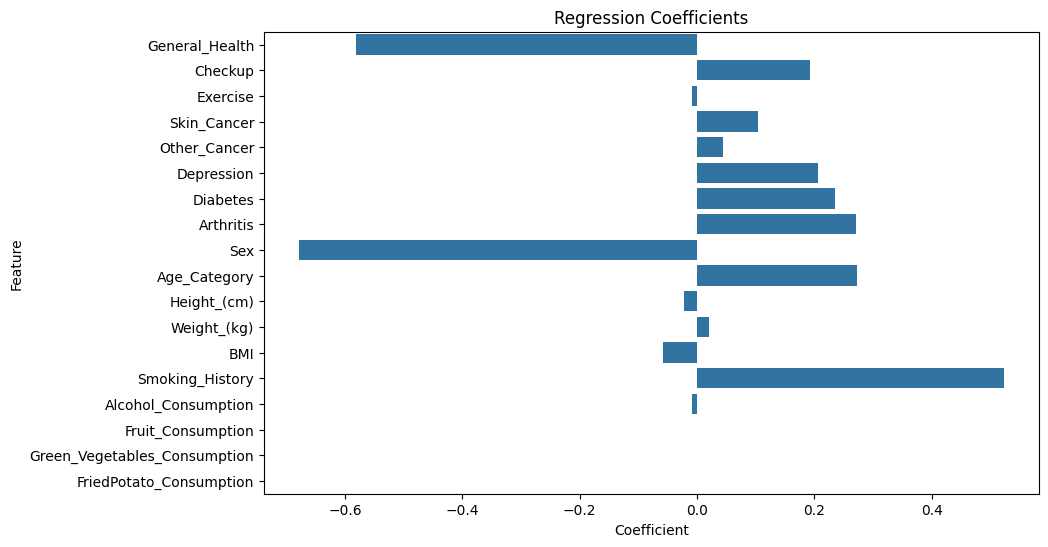

In [22]:
# Plot coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Regression Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

The barplot of regression coefficients provides insights into the impact of different features on the prediction of heart disease risk.

* Positive coefficients indicate features that positively contribute to the likelihood of heart disease, meaning an increase in these features leads to a higher risk of heart disease.
* Negative coefficients suggest features that negatively affect the likelihood of heart disease, implying that an increase in these features is associated with a lower risk of heart disease.
* The magnitude of the coefficients indicates the strength of the relationship between each feature and the outcome, with larger coefficients having a more significant impact on the prediction.
Features with coefficients close to zero have little to no effect on the prediction of heart disease risk.
* For our dataset, If we see General health  has the highest negetive coefficient that means that if the general health is bad there are more chances for a heart disease.

# **SHAP ANALYSIS FOR THE REGRESSION MODEL**

In [23]:
%%capture
!pip install shap
import shap

In [24]:
import shap
shap.initjs()

In [25]:
# Giving input as 1% of whole dataset as SHAP cant handle large dataset
X = X_train.sample(frac=0.01,random_state=200)
#LinearExplainer is used as linear regression model is used
explainer = shap.LinearExplainer(lr_model, X, feature_perturbation="interventional")
shap_values = explainer.shap_values(X) #Saving SHAP values

/usr/local/lib/python3.10/dist-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


In [26]:
#Initialize java script
shap.initjs()

 #Explain one row in the data with the
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

* SHAP values above the base value would indicate factors that increase the probability of approval, while values below the base value would indicate factors that decrease the probability.

In [27]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)

* The force plot visualizes how each feature affects the model's prediction for each category or instance.
* Each horizontal bar in the plot represents a feature, and the length and direction of the bar show the magnitude and direction of its impact on the prediction.
* Positive values push the prediction higher, while negative values push it lower.

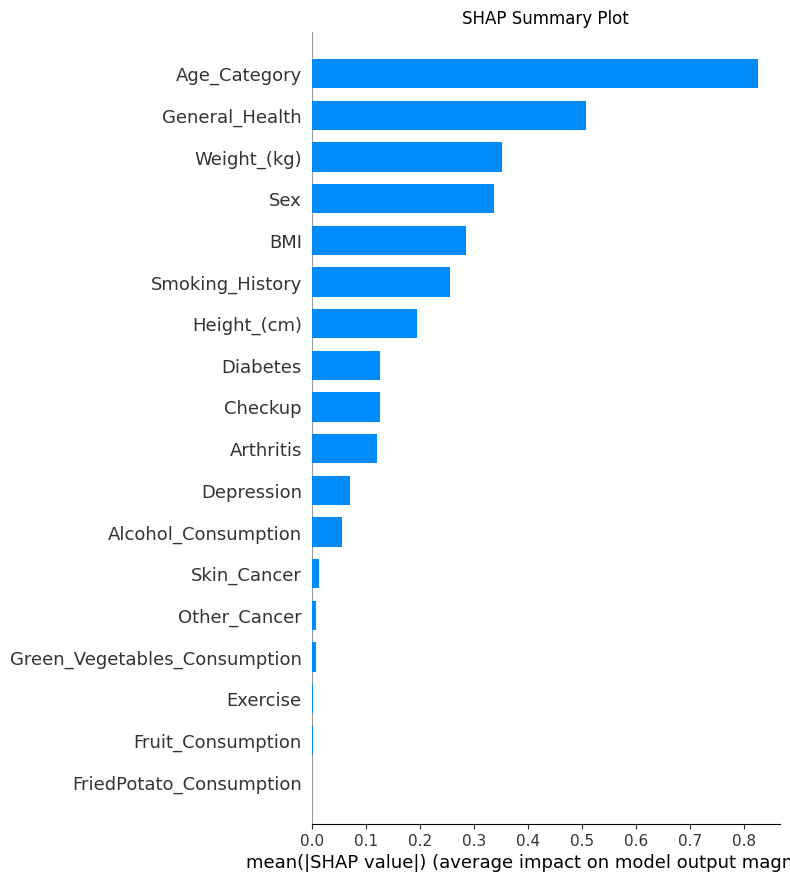

In [ ]:
import shap

# Transform X_train and X_test to a format compatible with SHAP
explainer = shap.Explainer(lr_model, X_train)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type='bar', show=False)
plt.title('SHAP Summary Plot')
plt.show()


* The length of the bars in the summary plot indicates the magnitude of the
impact that each feature has on the model's output. Larger bar lengths suggest that the feature has a more significant influence on the model's predictions, while shorter bar lengths indicate a weaker influence.

* The scale of the SHAP values is aligned with the scale of the model's output. For example, if the model predicts probabilities (e.g., for binary classification), the SHAP values will be in the range of 0 to 1. If the model predicts numerical values, the SHAP values will be in the same numerical scale.





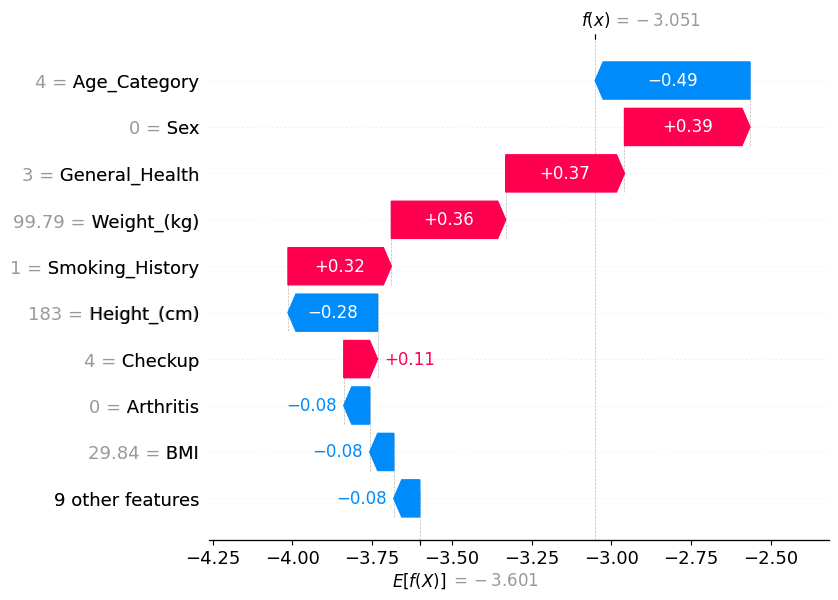

In [ ]:
explainer = shap.Explainer(lr_model, X)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])

* The plot starts with a vertical line labeled "base value," which represents the model's average prediction across all instances in the dataset.
* Each step in the plot represents the contribution of a specific feature to the prediction. The length and direction of the steps indicate the impact of each feature.
* Positive steps (to the right) indicate features that push the prediction higher, while negative steps (to the left) indicate features that push the prediction lower.
* The final vertical bar at the end of the plot shows the overall prediction for the instance, considering the contributions of all features.

# **Regresssion Model Interpretation Conclusion:**

* Most Impactful Feature:
The feature with the highest positive coefficient is "Smoking History" (0.522698). This positive coefficient indicates that having a smoking history has the highest impact on increasing the likelihood of heart disease among the features listed.
* Least Impactful Feature:
The feature with the coefficient closest to zero is "Fruit Consumption" (0.000115). While this coefficient is positive, indicating a slight increase in the likelihood of heart disease with higher fruit consumption, its magnitude is the smallest among the coefficients listed. Therefore, "Fruit Consumption" has the least impact on the likelihood of heart disease among the features provided.

# **RANDOM FOREST MODEL**

In [28]:
import random, os, sys
from sklearn.ensemble import RandomForestRegressor

def randomforest(X_train,y_train,X_test,y_test):
    rf = RandomForestRegressor()
    rf_model = rf.fit(X_train,y_train)
    print('Train set')
    pred=rf_model.predict(X_train)
    print('randomforest Mean Squared error :{}'.format(mean_squared_error(y_train,pred)))
    print('randomforest r2_score :{}'.format(r2_score(y_train,pred)))
    print('Tesst set')
    pred=rf_model.predict(X_test)
    print('randomforest Mean Squared error :{}'.format(mean_squared_error(y_test,pred)))
    print('randomforest r2_score :{}'.format(r2_score(y_test,pred)))

random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [29]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'Heart_Disease'],
      dtype='object')

In [30]:
cols1= ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

In [31]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
randomforest(X_train[cols1],y_train,X_test[cols1],y_test)

Train set
randomforest Mean Squared error :0.009611221589850512
randomforest r2_score :0.8706504473334405
Tesst set
randomforest Mean Squared error :0.0688904350459313
randomforest r2_score :0.07344895821030917


# **SHAP ANALYSIS ON RANDOM FOREST MODEL**

In [32]:
%%capture
!pip install shap
import shap

In [33]:
# Giving input as 1% of whole dataset as SHAP cant handle large dataset
X = X_train.head(10)
 # Using Tree explainer as this is tree based classifier model
explainer = shap.TreeExplainer(random_forest)
#Saving shap values
shap_values = explainer.shap_values(X)

In [34]:
shap.initjs() #Initialize java script
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:]) #Explain one row in the data with the model

* SHAP values above the base value would indicate factors that increase the probability of approval, while values below the base value would indicate factors that decrease the probability.

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)

* The force plot visualizes how each feature affects the model's prediction for each category or instance.
* Each horizontal bar in the plot represents a feature, and the length and direction of the bar show the magnitude and direction of its impact on the prediction.
* Positive values push the prediction higher, while negative values push it lower.

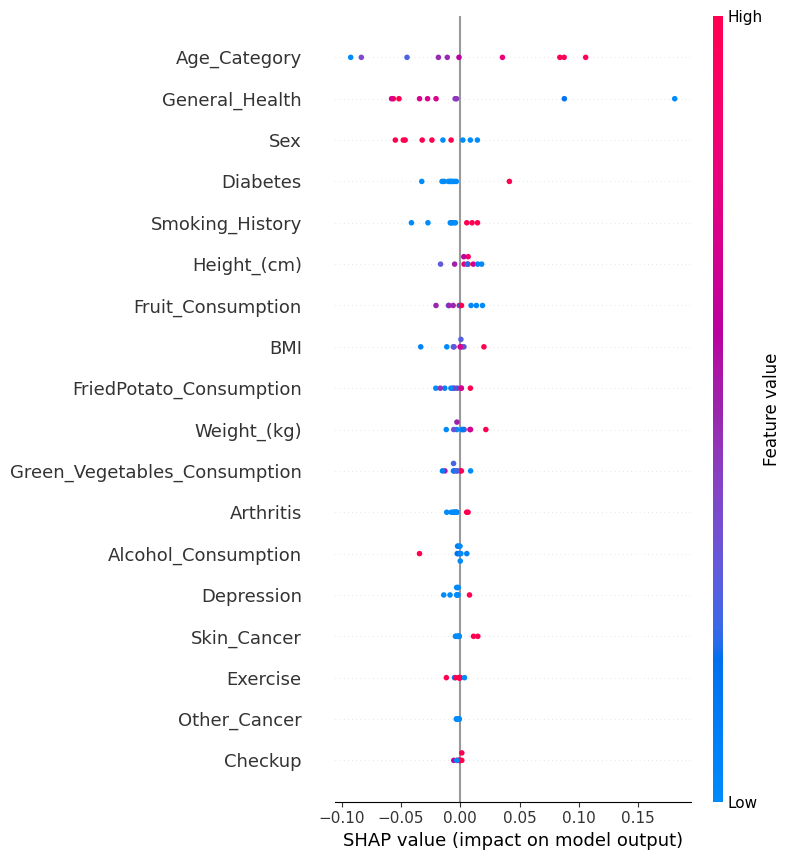

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X)

* The summary plot visualizes the overall impact of each feature on the model's predictions across the entire dataset.
* Each feature is represented by a vertical bar, where the length of the bar corresponds to the magnitude of its impact on the model's output.

* Features are sorted by their importance, with the most influential features appearing at the top.
* The color of each bar indicates the direction of the feature's effect: red bars indicate features that push the prediction higher, while blue bars indicate features that push the prediction lower.
* The plot also includes a feature importance plot at the bottom, which ranks the features based on their importance in the model's predictions.

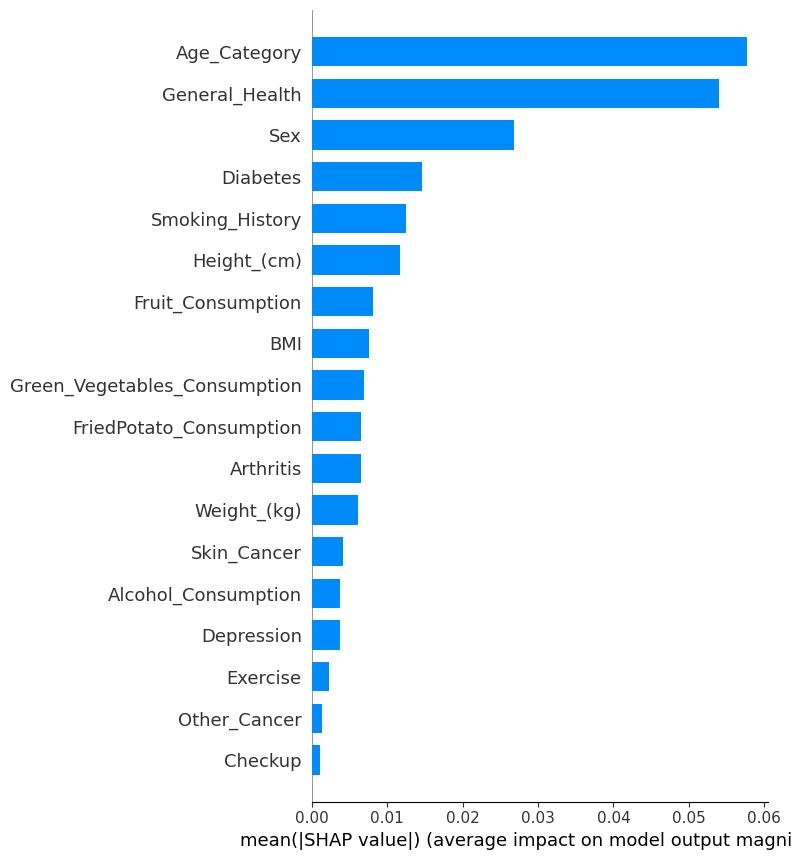

In [35]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
iris = load_iris()

model_rf1 = RandomForestRegressor(n_estimators=10)
# Train
model_rf1.fit(iris.data, iris.target)
# Extract single tree
estimator = model_rf1.estimators_[5]

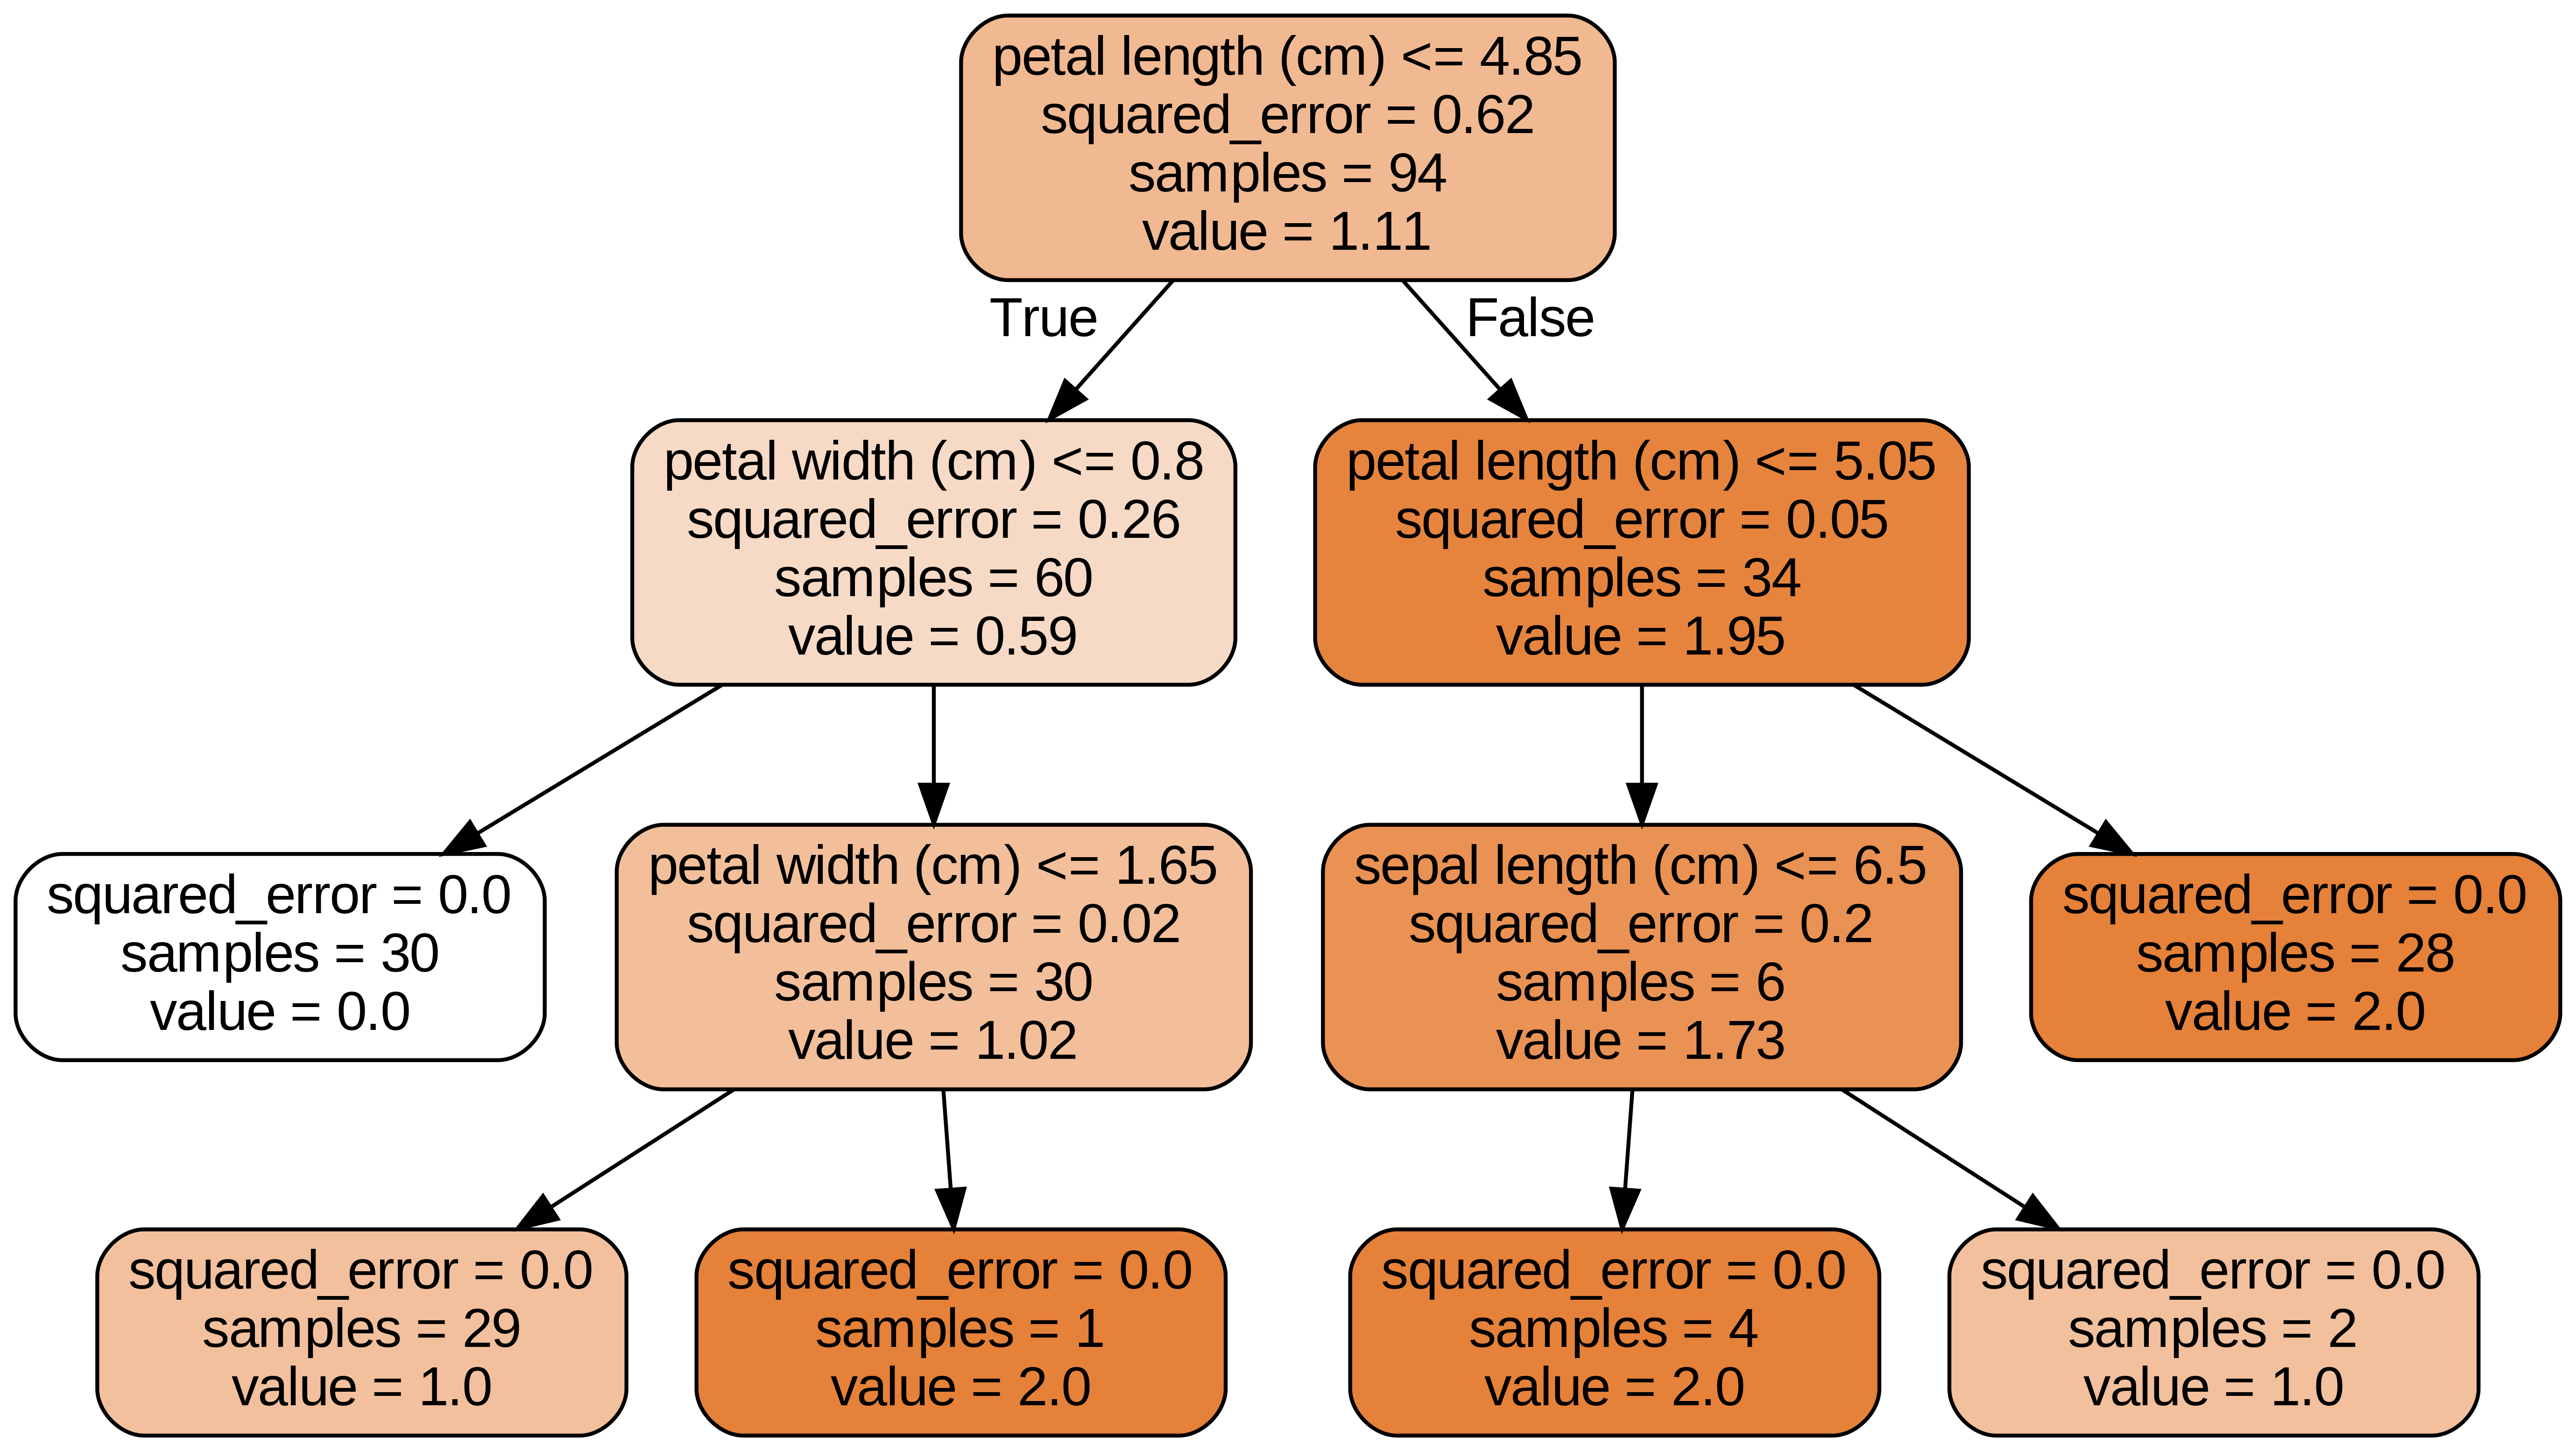

In [37]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot',
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False,
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in colab notebook
from IPython.display import Image
Image(filename = 'tree.png')

# **Tree-Based Model Interpretation:**
* We can infer that "age category" is the most influential feature in the Random Forest model, while "checkup" is the least influential. This means that the model relies heavily on age categories to make predictions, whereas regular checkup frequency has less impact on its decisions.

# **AutoML to identify best model**

In [38]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [39]:
from distutils.util import strtobool
import psutil

pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

5


In [40]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 4.7 MB/s eta 0:00:00


In [41]:

!pip install xgboost
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

sns.set(rc={"figure.figsize": (16, 8)})

In [43]:
import random
import logging
import sys
import h2o
min_mem_size = 4
logs_path = "/tmp/"
logfile = "h2o_logs.log"


# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:33681..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp3wbu5855
  JVM stdout: /tmp/tmp3wbu5855/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp3wbu5855/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:33681
Connecting to H2O server at http://127.0.0.1:33681 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    4 days
H2O_cluster_name:           H2O_from_python_unknownUser_m7ettn
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    4 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:33681
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [44]:
h2o_df = h2o.H2OFrame(
   df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [45]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = h2o_df.split_frame([pct_rows])

In [46]:
print(df_train.shape)
print(df_test.shape)

(247304, 19)
(61550, 19)


In [47]:


# Set the features and target
X=h2o_df.columns
print(X)

y ='Heart_Disease'
X.remove(y)
print(X)

['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Heart_Disease']
['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


In [48]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [49]:
aml.train(x=X, y=y, training_frame=df_train)

AutoML progress: |
21:26:42.381: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███████████████████
21:27:47.781: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
21:27:52.692: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██████████████████
21:28:56.45: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
21:29

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240317_212641


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  --------
Stacking strategy                     blending
Number of base models (used / total)  6/8
# GBM base models (used / total)      3/4
# XGBoost base models (used / total)  1/2
# GLM base models (used / total)      1/1
# DRF base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    AUTO
Metalearner nfolds                    0
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.059887223761405484
RMSE: 0.24471866247061233
MAE: 0.12517578251022915
RMSLE: 0.17043558585534838
Mean Residual Deviance: 0.059887223761405484
R^2: 0.19739324792830237
Null degrees of freedom: 9973
Residual degrees of freedom: 9967
Null deviance: 744.2199887453112
Residual deviance: 597.3151697962583
AIC: 241.26256060361703

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 0.062124543220052626
RMSE: 0.24924795529763655
MAE: 0.1266311613474904
RMSLE: 0.17492589191223676
Mean Residual Deviance: 0.062124543220052626
R^2: 0.1301475617689396
Null degrees of freedom: 24685
Residual degrees of freedom: 24679
Null deviance: 1763.4838329245172
Residual deviance: 1533.6064739302192
AIC: 1478.9644239203242

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [50]:
print(aml.leaderboard)

model_id                                                     rmse        mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20240317_212641     0.249248  0.0621245  0.126631  0.174926                 0.0621245
StackedEnsemble_BestOfFamily_2_AutoML_1_20240317_212641  0.249298  0.0621496  0.126873  0.174949                 0.0621496
GBM_2_AutoML_1_20240317_212641                           0.249305  0.0621531  0.126974  0.17469                  0.0621531
GBM_3_AutoML_1_20240317_212641                           0.249583  0.0622918  0.128477  0.174445                 0.0622918
StackedEnsemble_BestOfFamily_1_AutoML_1_20240317_212641  0.249983  0.0624915  0.129677  0.17542                  0.0624915
GBM_1_AutoML_1_20240317_212641                           0.250644  0.0628224  0.1267    0.176421                 0.0628224
GBM_4_AutoML_1_20240317_212641                           0.25092   0.0629609  0.131043  0.174945                 0.0629609
DeepLearning_1_A

In [51]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                     rmse        mse       mae     rmsle    mean_residual_deviance
-------------------------------------------------------  --------  ---------  --------  --------  ------------------------
StackedEnsemble_AllModels_1_AutoML_1_20240317_212641     0.249248  0.0621245  0.126631  0.174926                 0.0621245
StackedEnsemble_BestOfFamily_2_AutoML_1_20240317_212641  0.249298  0.0621496  0.126873  0.174949                 0.0621496
GBM_2_AutoML_1_20240317_212641                           0.249305  0.0621531  0.126974  0.17469                  0.0621531
GBM_3_AutoML_1_20240317_212641                           0.249583  0.0622918  0.128477  0.174445                 0.0622918
StackedEnsemble_BestOfFamily_1_AutoML_1_20240317_212641  0.249983  0.0624915  0.129677  0.17542                  0.0624915
GBM_1_AutoML_1_20240317_212641                           0.250644  0.0628224  0.1267    0.176421                 0.0628224
GBM_4_AutoML_1_20240317_212641                           0.25092   0.0629609  0.131043  0.174945                 0.0629609
DeepLearning_1_AutoML_1_20240317_212641                  0.251176  0.0630893  0.133714  0.176716                 0.0630893
GLM_1_AutoML_1_20240317_212641                           0.25282   0.0639182  0.143992  0.178172                 0.0639182
XGBoost_2_AutoML_1_20240317_212641                       0.254792  0.064919   0.12929   0.180332                 0.064919
GBM_5_AutoML_1_20240317_212641                           0.263101  0.0692221  0.143596  0.183134                 0.0692221
XGBoost_1_AutoML_1_20240317_212641                       0.267254  0.0714249  0.140282  0.192666                 0.0714249
DRF_1_AutoML_1_20240317_212641                           0.26967   0.072722   0.132242  0.194038                 0.072722
XGBoost_3_AutoML_1_20240317_212641                       0.291958  0.0852394  0.255635  0.228317                 0.0852394
XRT_1_AutoML_1_20240317_212641                           0.321672  0.103473   0.136122  0.225835                 0.103473
[15 rows x 6 columns]

In [52]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'StackedEnsemble_AllModels_1_AutoML_1_20240317_212641': 0,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20240317_212641': 1,
 'GBM_2_AutoML_1_20240317_212641': 2,
 'GLM_1_AutoML_1_20240317_212641': 8}

In [53]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

2


In [54]:
#Printing the best model
print("The best model is - " , best_model.algo)

The best model is -  gbm


In [55]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

<ipython-input-55-a0f01d27643e>:8: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


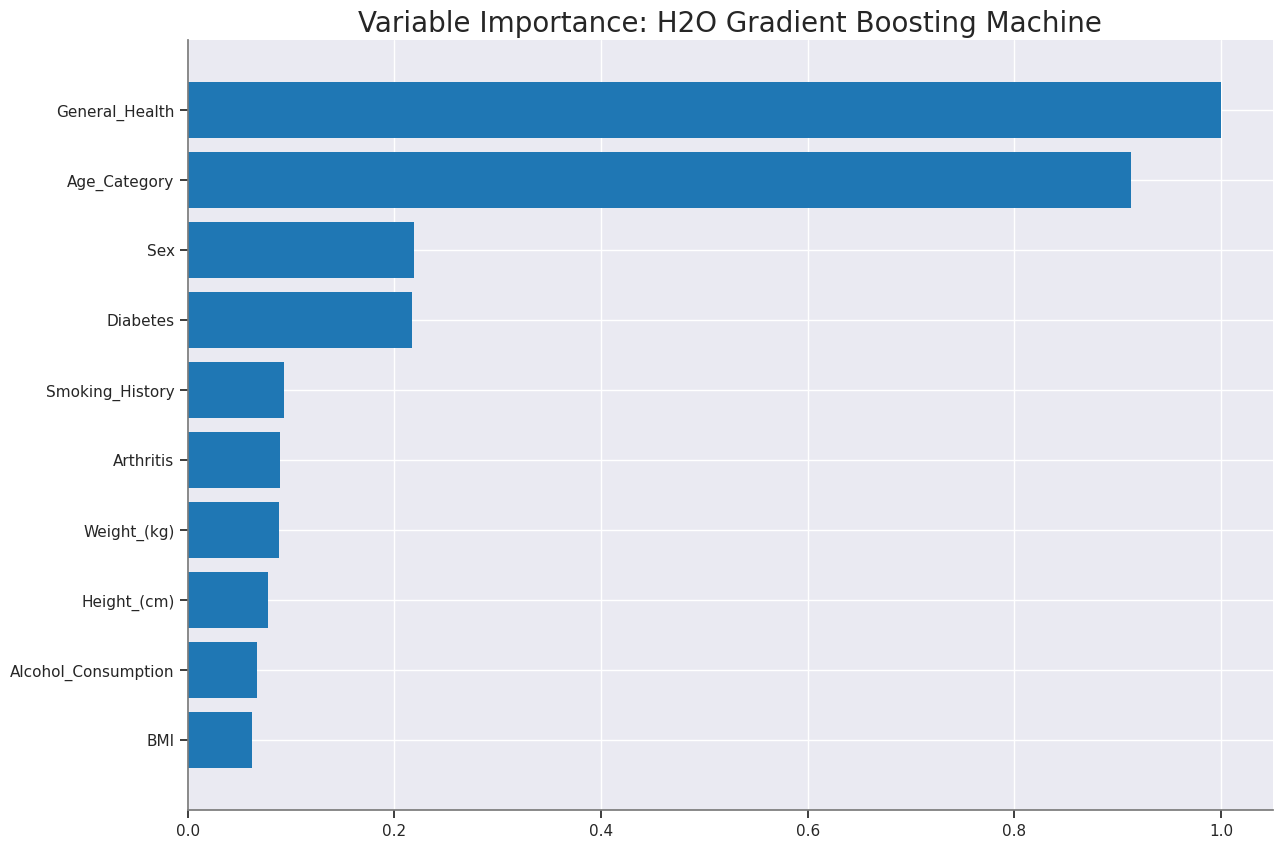

<Figure size 1600x800 with 0 Axes>

In [56]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-57-0cab54a0793b>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


8
glm


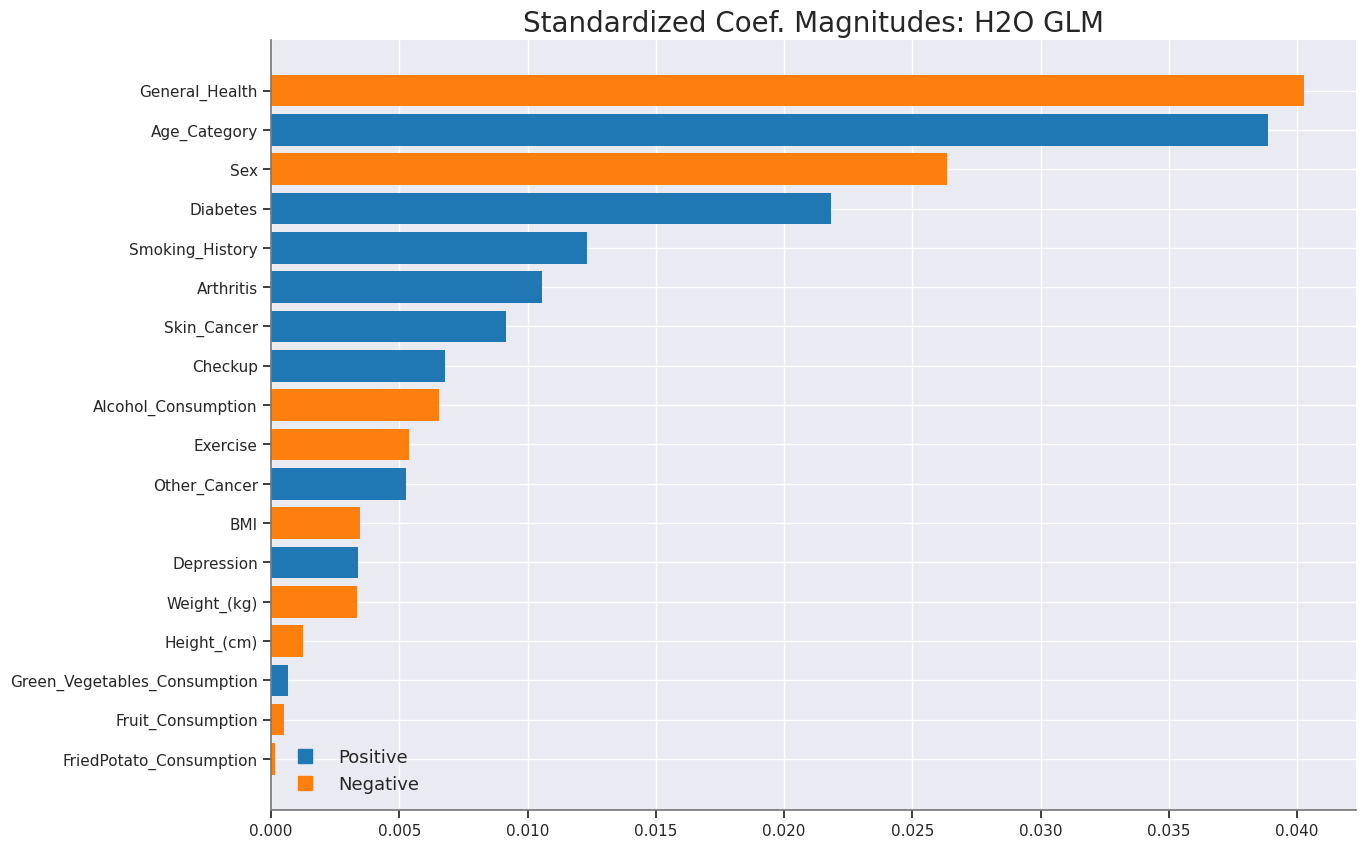

In [57]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

# **SHAP ANALYSIS FOR AUTOML MODEL**

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     rmse        mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  --------  --------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_2_AutoML_1_20240315_172145     0.250967  0.0629844  0.126351  0.175639                 0.0629844                3258                   0.102436  StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20240315_172145  0.250999  0.0630003  0.126678  0.175666                 0.0630003                3687                   0.077299  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20240315_172145     0.25129   0.0631465  0.127667  0.175898                 0.0631465                4357                   0.039706  StackedEnsemble
XGBoost_3_AutoML_1_20240315_172145                       0.251341  0.0631724  0.127436  0.176191                 0.0631724                8006                   0.004732  XGBoost
StackedEnsemble_BestOfFamily_2_AutoML_1_20240315_172145  0.251361  0.0631822  0.127997  0.175947                 0.0631822                5593                   0.034152  StackedEnsemble
GBM_2_AutoML_1_20240315_172145                           0.251386  0.0631949  0.126634  0.176179                 0.0631949               15242                   0.016553  GBM
GBM_5_AutoML_1_20240315_172145                           0.251625  0.0633152  0.129285  0.17555                  0.0633152                6722                   0.006314  GBM
GBM_3_AutoML_1_20240315_172145                           0.251687  0.0633463  0.126667  0.176488                 0.0633463               17581                   0.043696  GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20240315_172145  0.252175  0.0635923  0.13153   0.176653                 0.0635923                4974                   0.023645  StackedEnsemble
GBM_1_AutoML_1_20240315_172145                           0.252622  0.0638176  0.127377  0.177391                 0.0638176               30771                   0.029556  GBM
GBM_4_AutoML_1_20240315_172145                           0.253103  0.0640612  0.127215  0.177717                 0.0640612               16613                   0.038767  GBM
DeepLearning_1_AutoML_1_20240315_172145                  0.253804  0.0644165  0.116154  0.175588                 0.0644165                6777                   0.007067  DeepLearning
GLM_1_AutoML_1_20240315_172145                           0.255588  0.0653251  0.146904  0.180169                 0.0653251                4905                   0.000753  GLM
XGBoost_2_AutoML_1_20240315_172145                       0.259587  0.0673852  0.131689  0.184085                 0.0673852               21526                   0.003567  XGBoost
DRF_1_AutoML_1_20240315_172145                           0.260199  0.0677034  0.1333    0.185438                 0.0677034               23526                   0.016803  DRF
XRT_1_AutoML_1_20240315_172145                           0.261085  0.0681655  0.132769  0.185676                 0.0681655                8392                   0.014212  DRF
XGBoost_1_AutoML_1_20240315_172145                       0.271266  0.0735854  0.144537  0.196019                 0.0735854               33303                   0.005675  XGBoost
[17 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

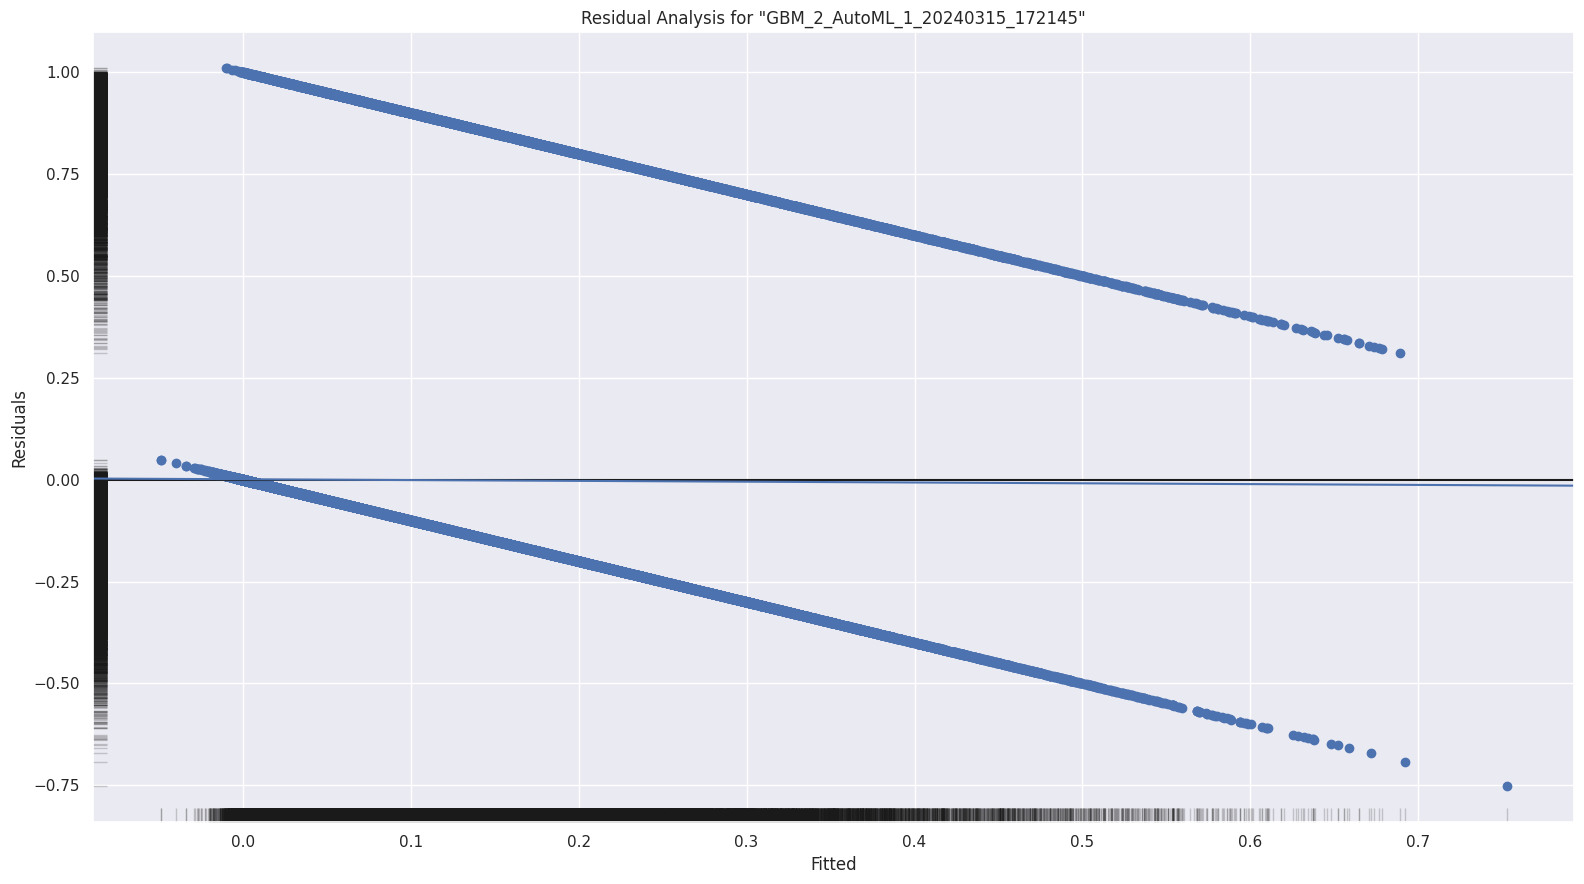

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

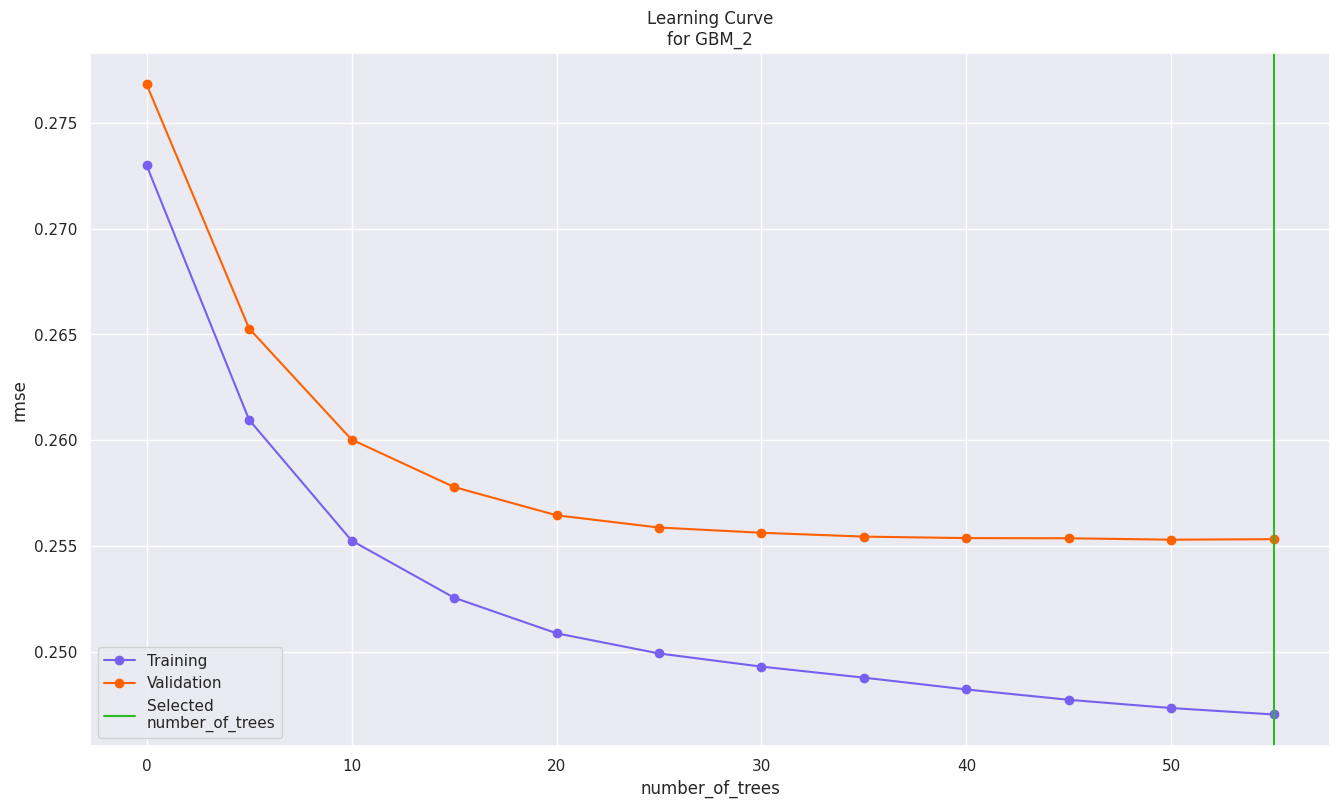

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

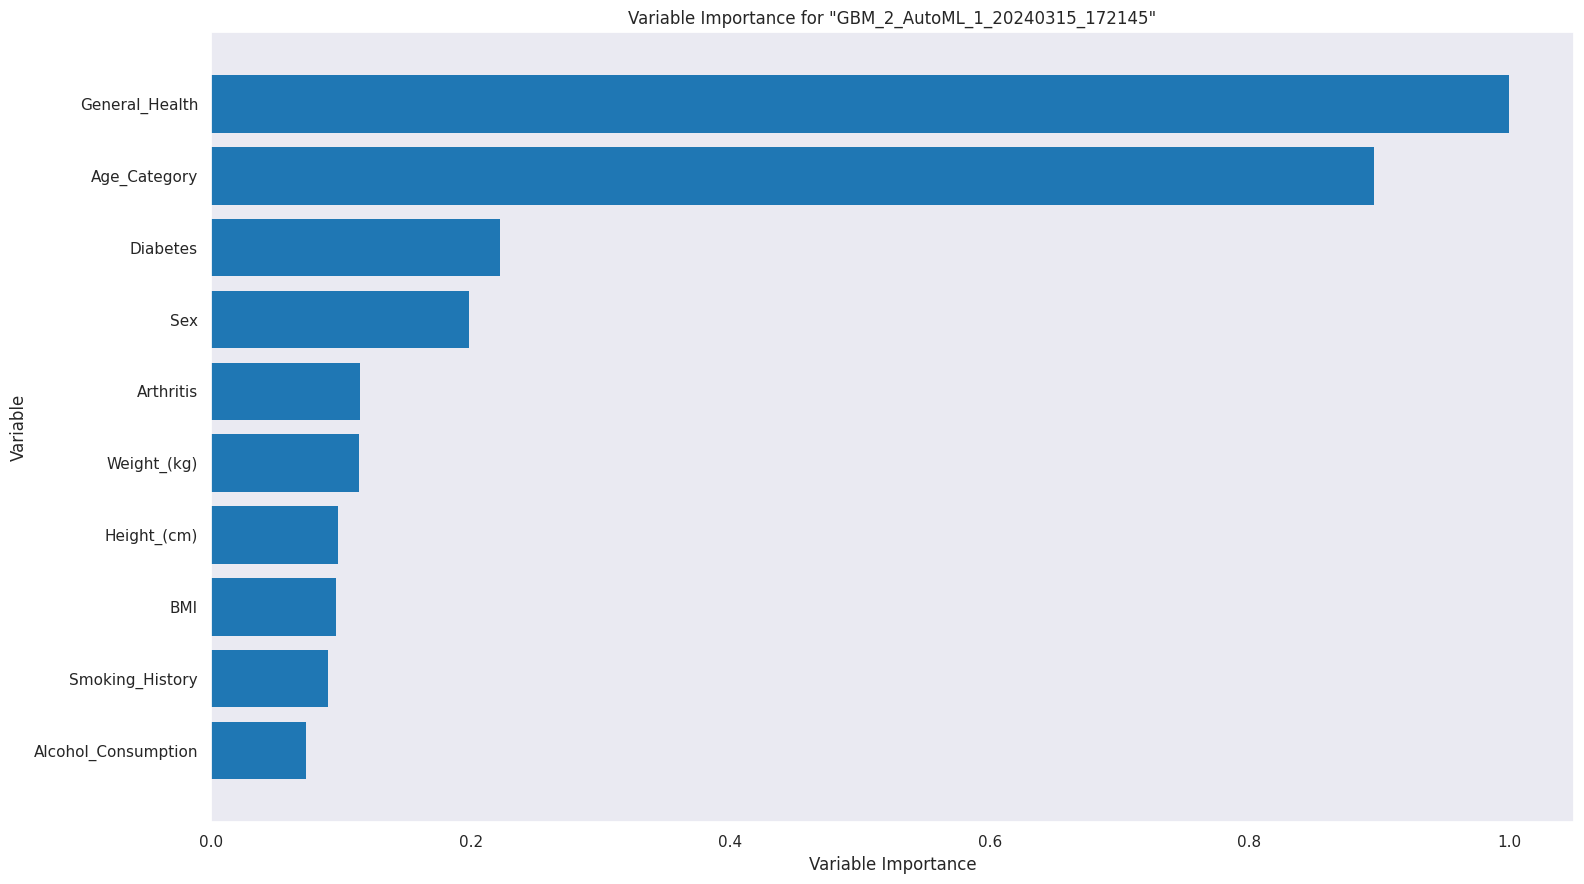

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

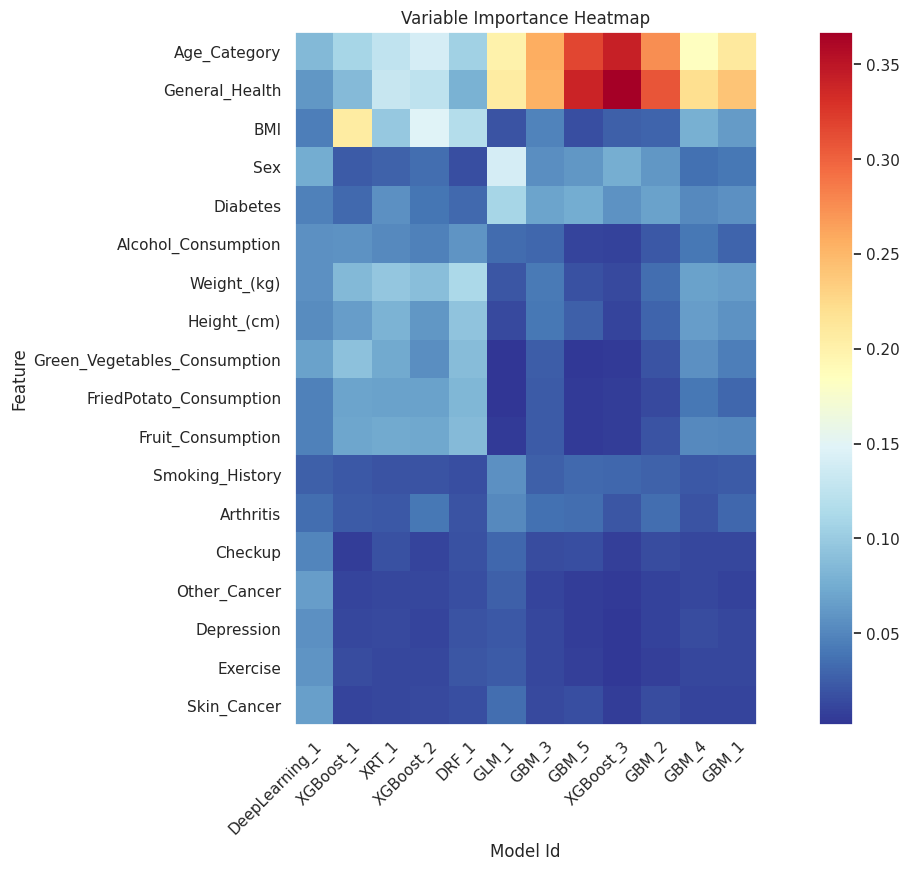

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

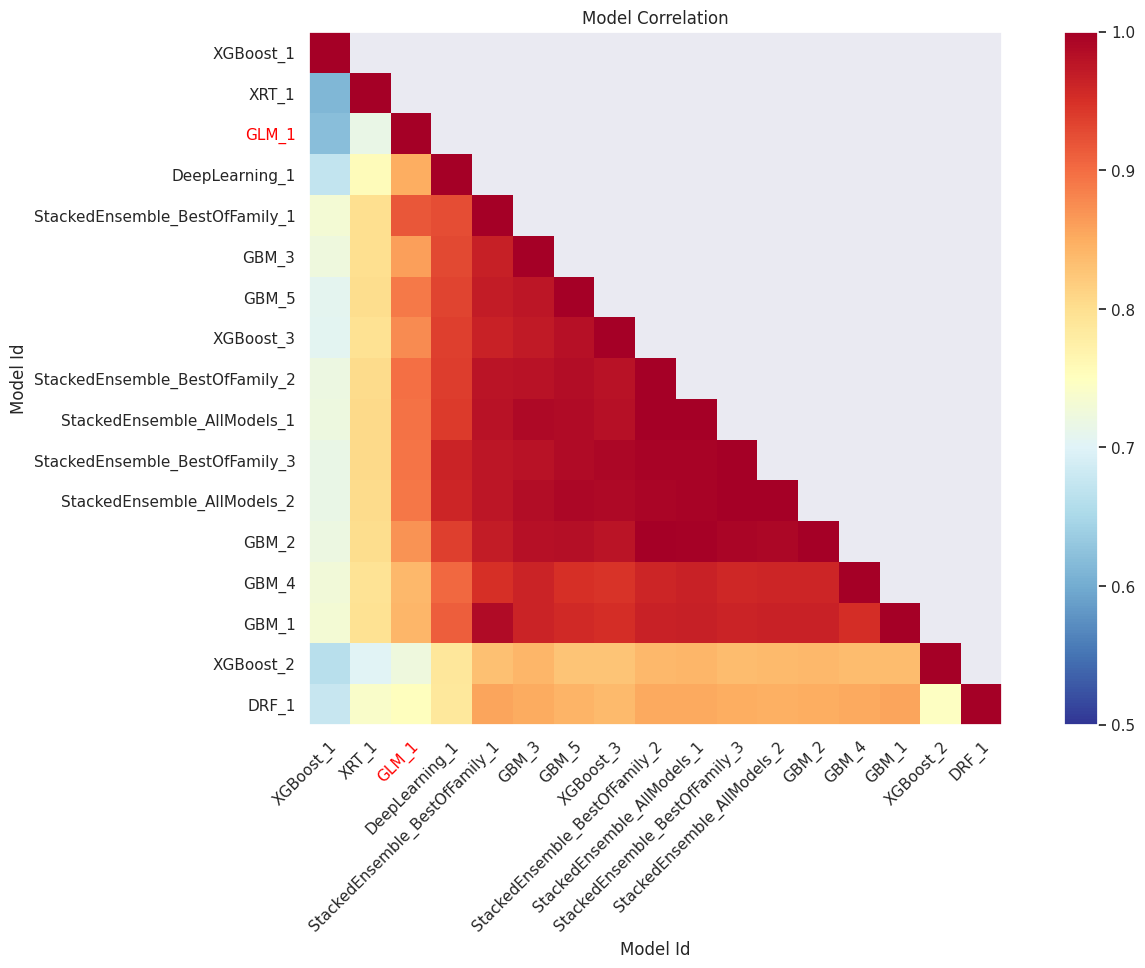

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

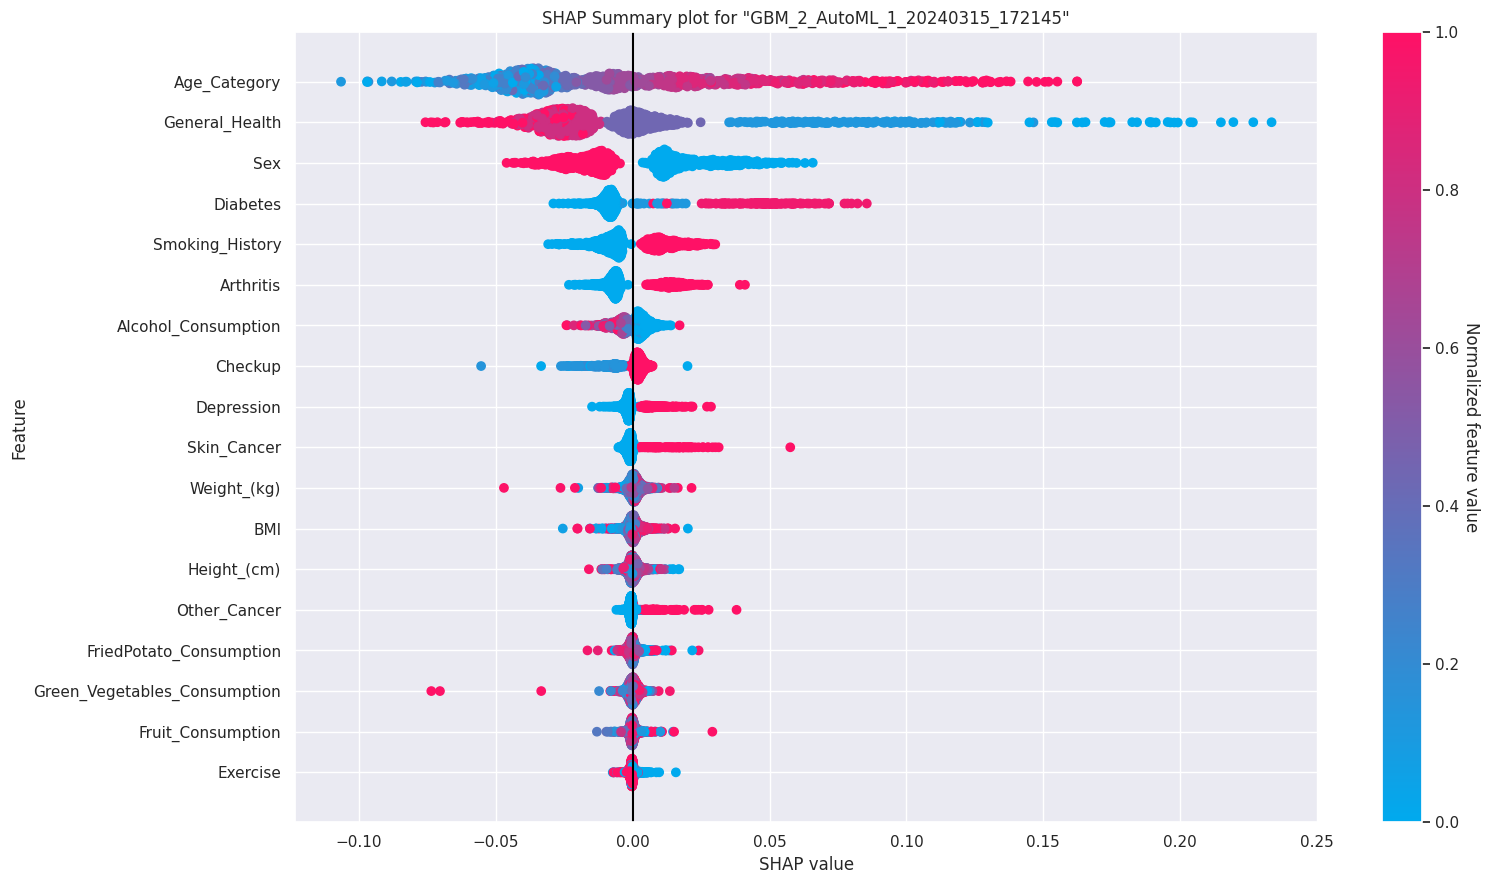

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

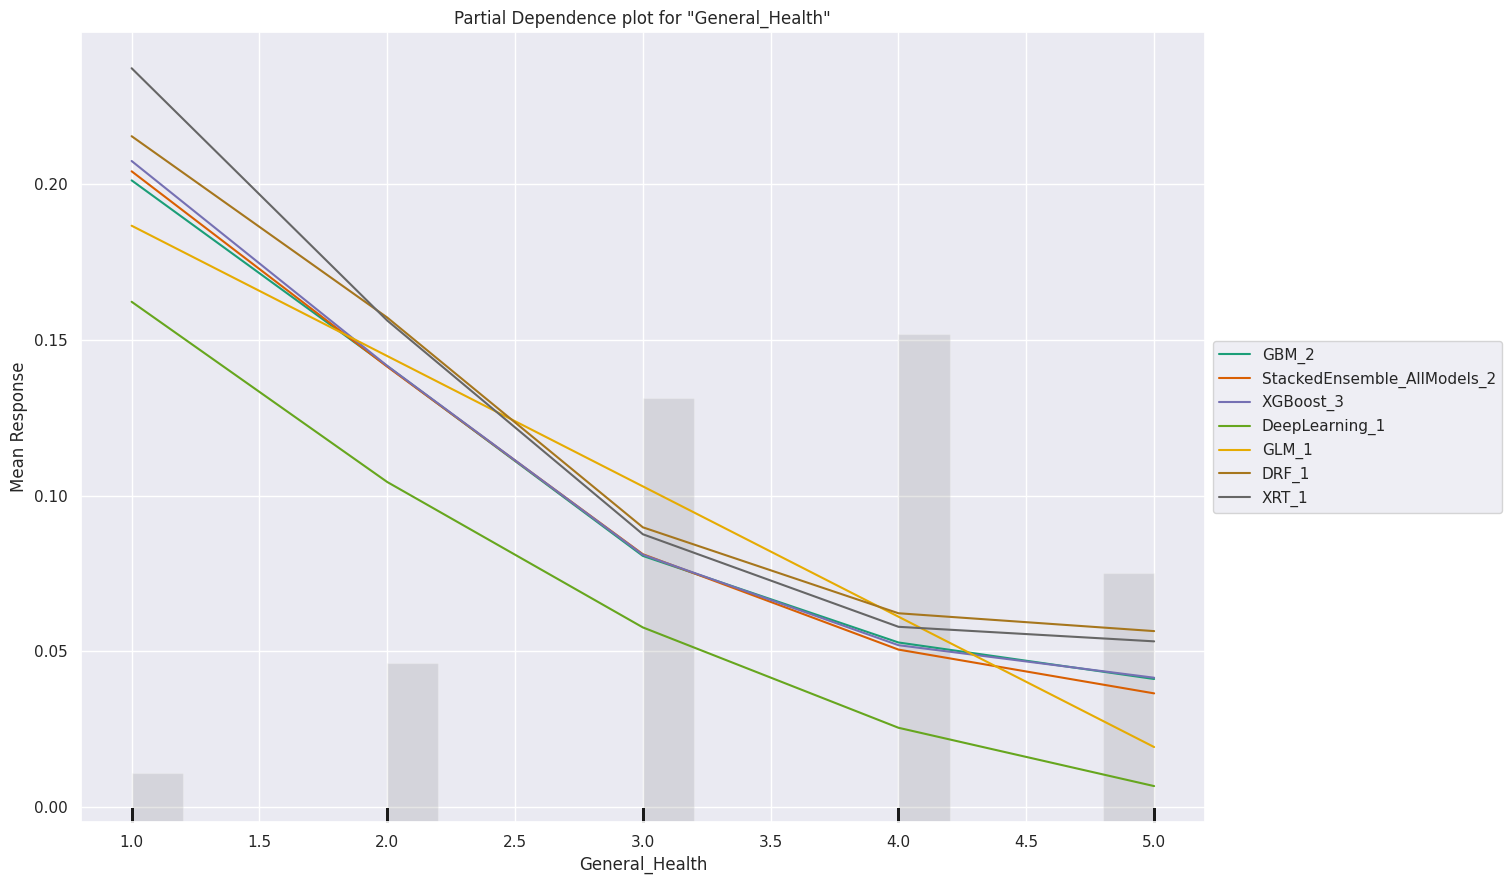

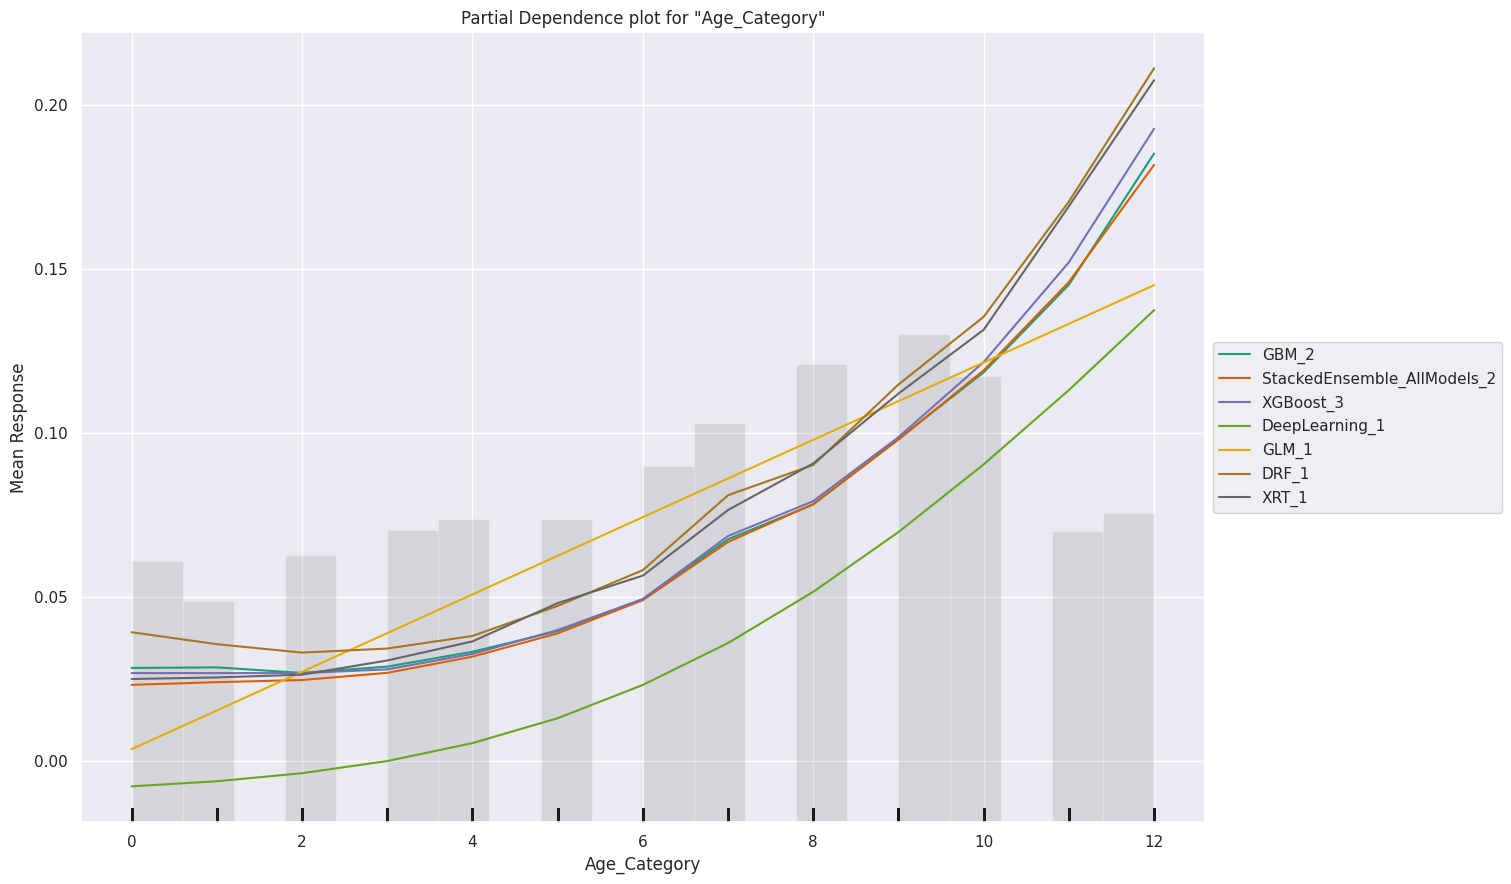

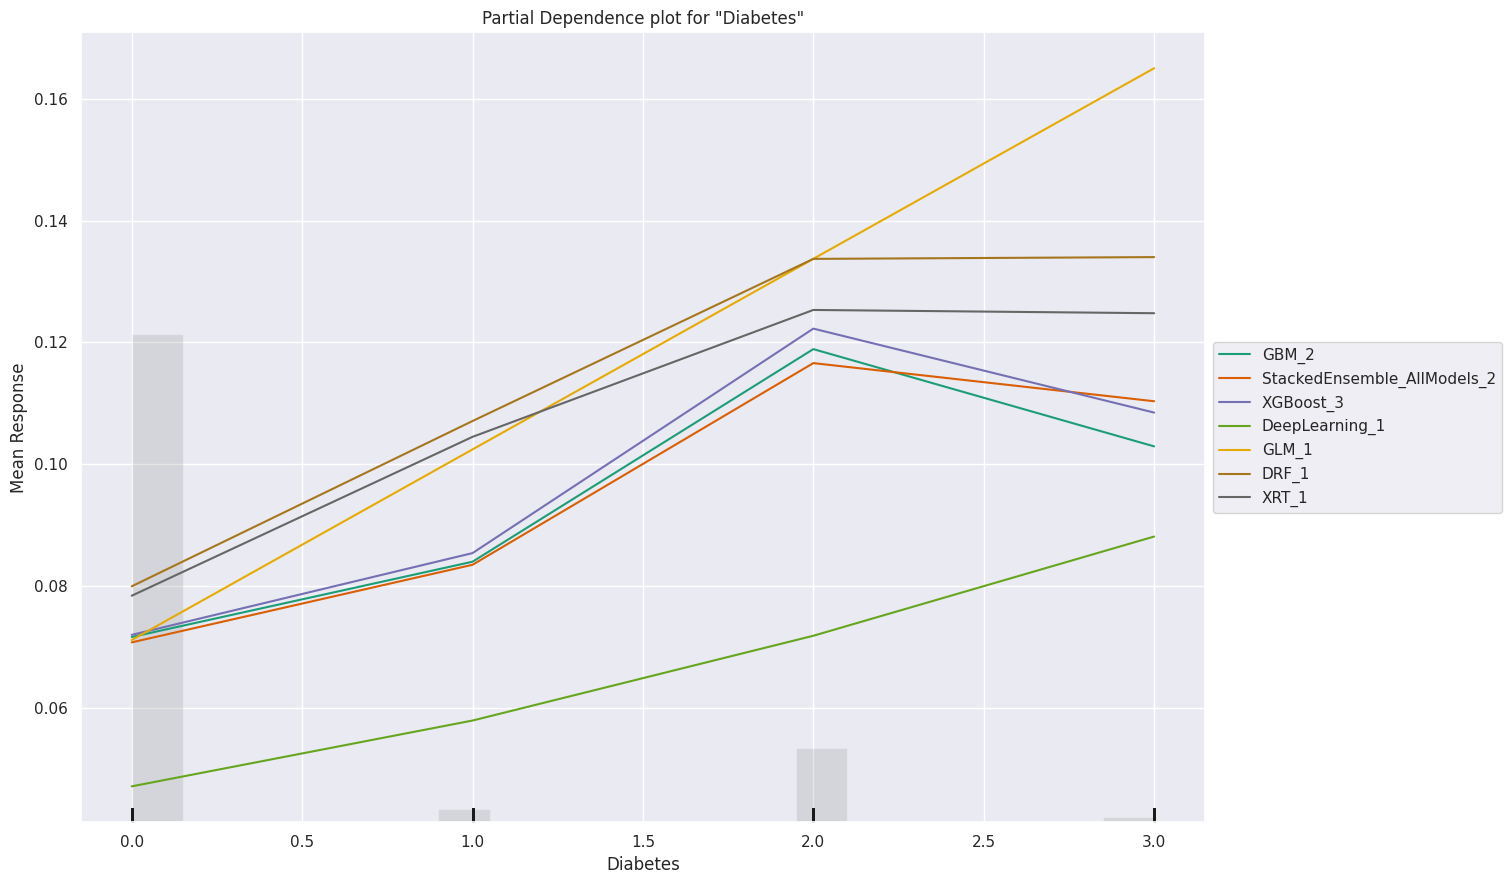

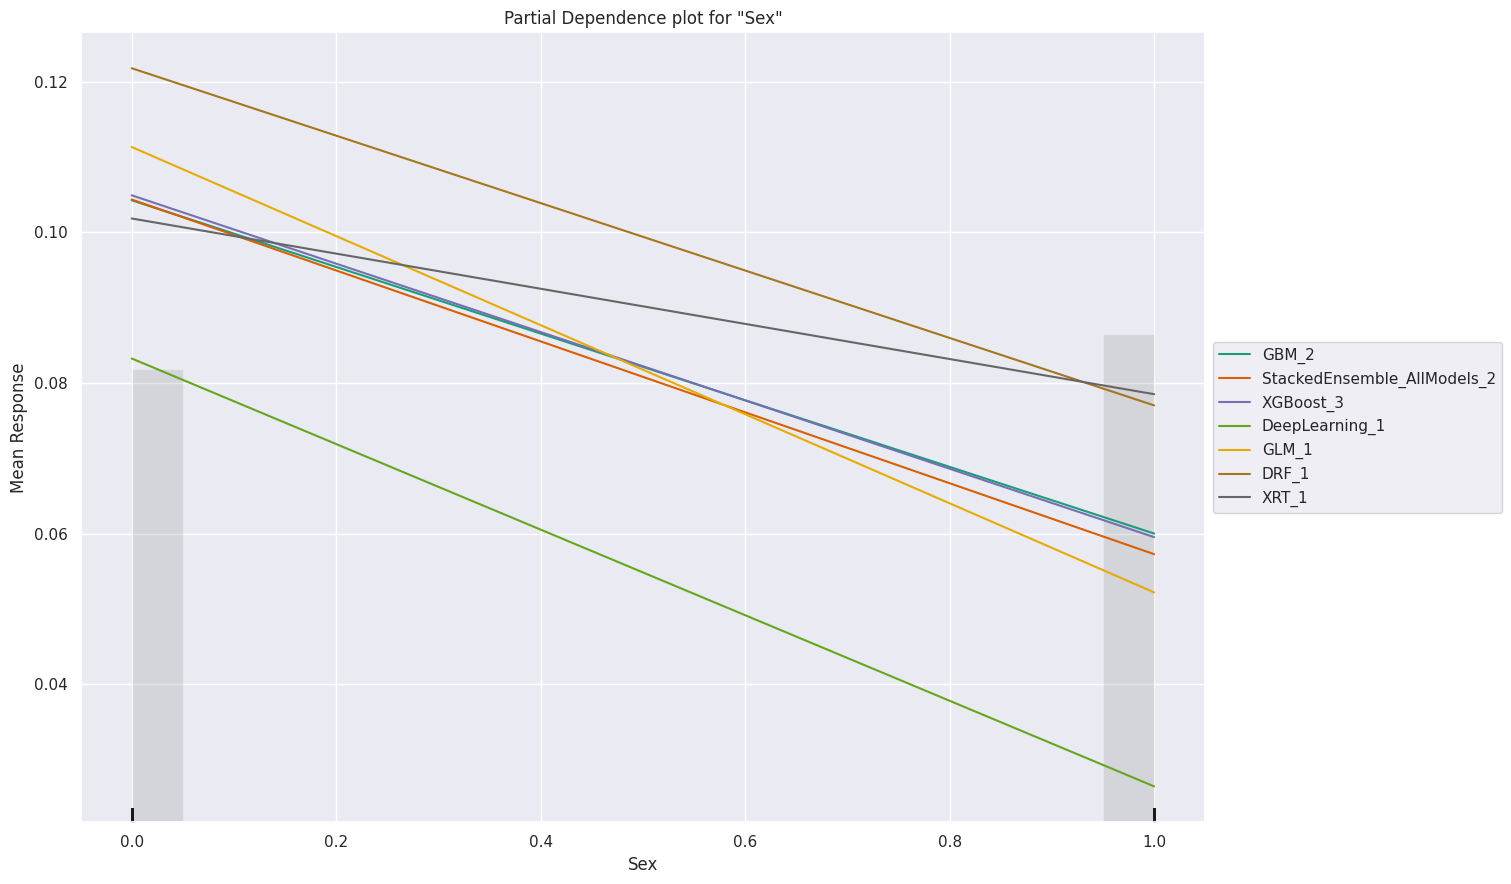

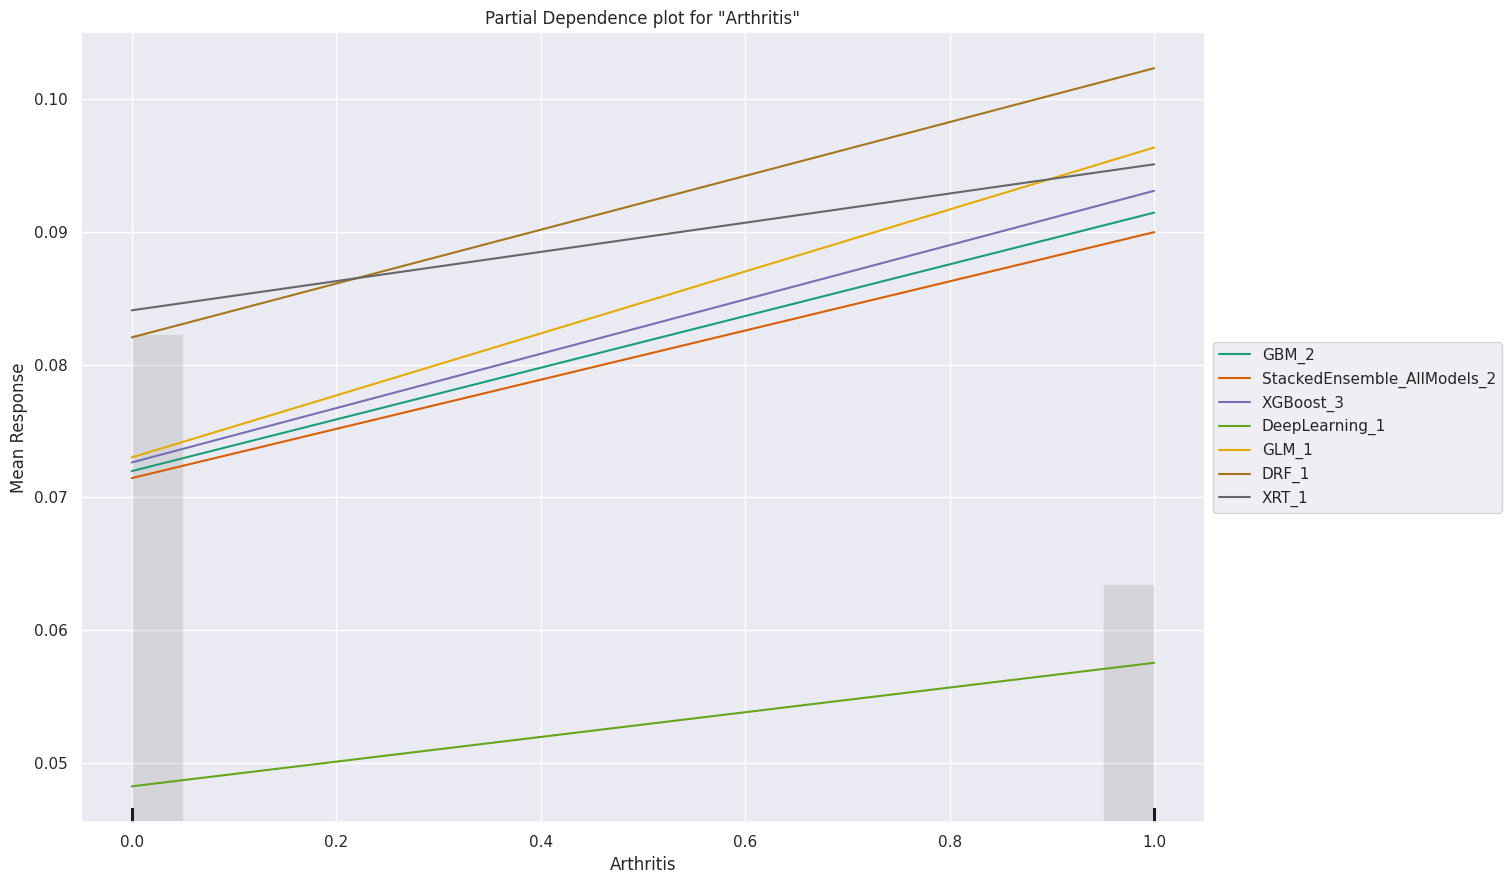

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

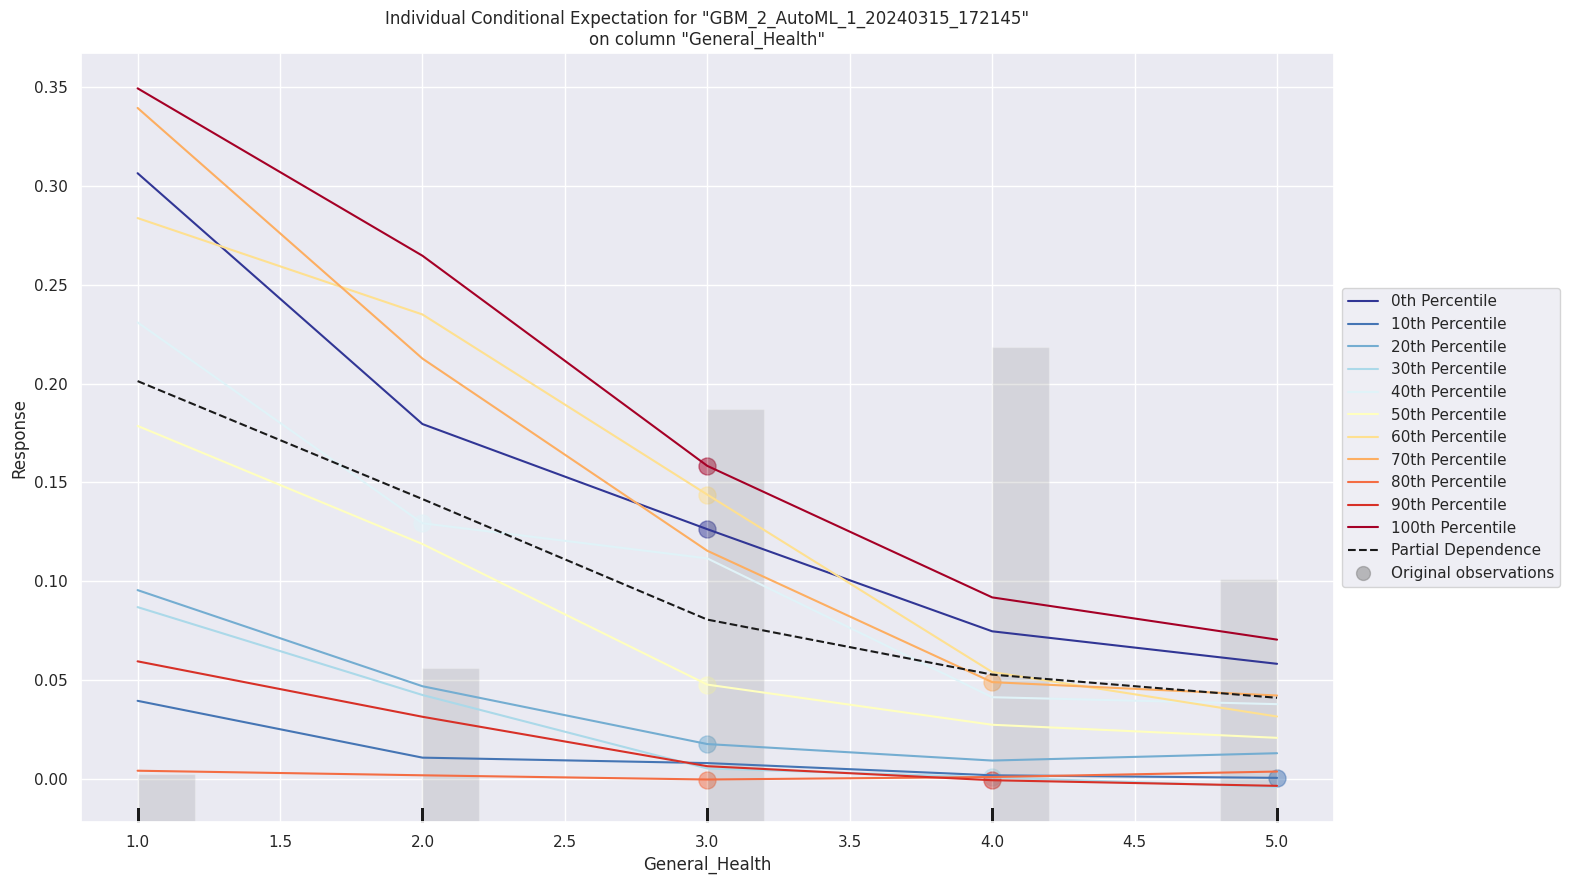

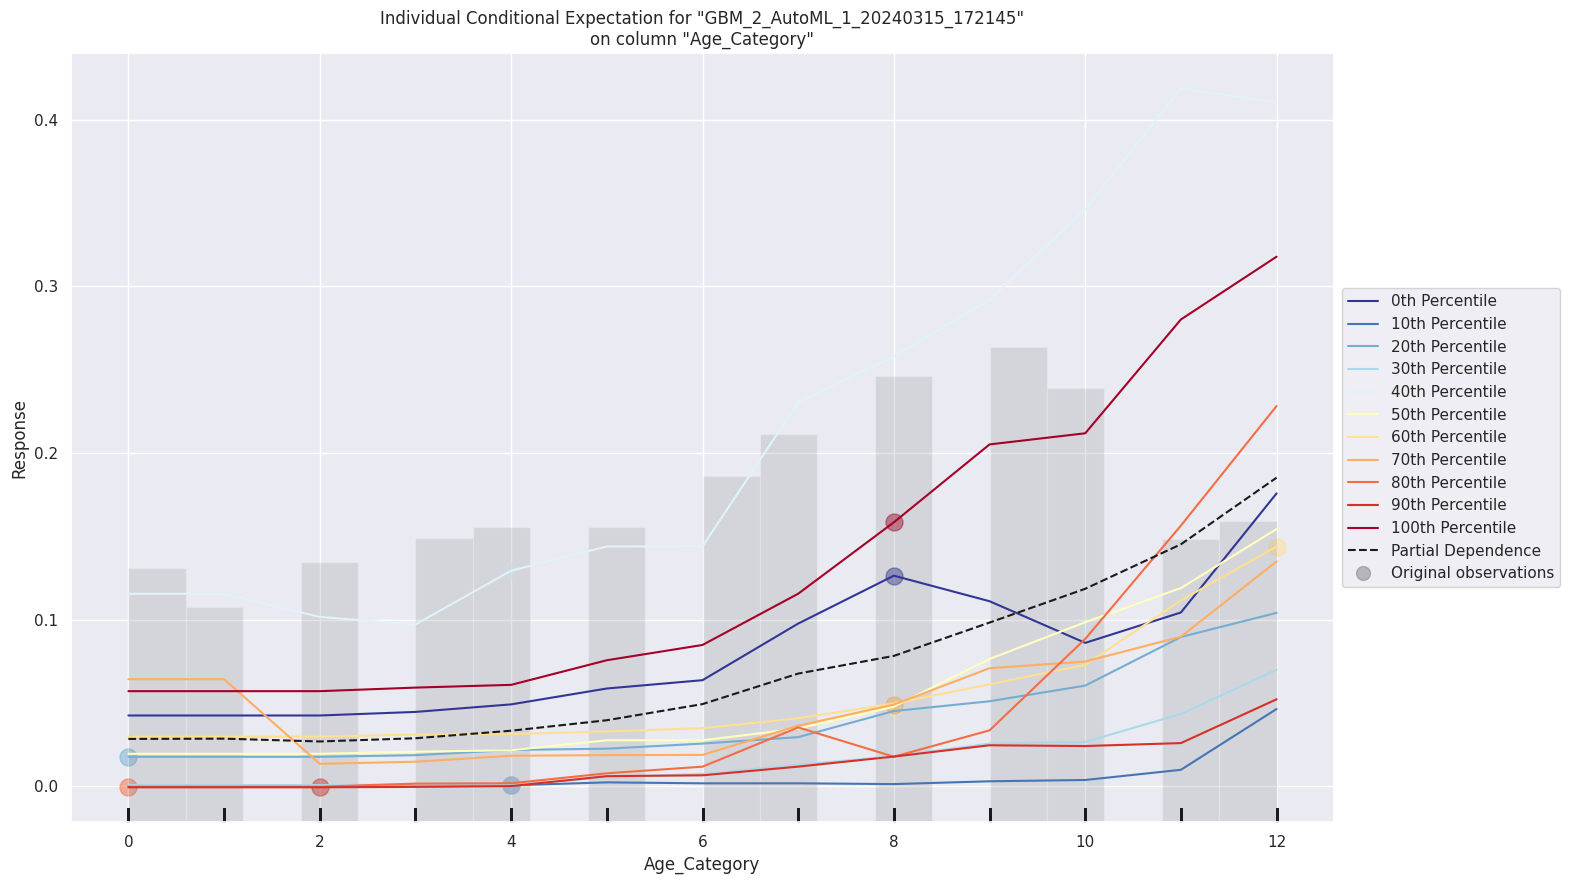

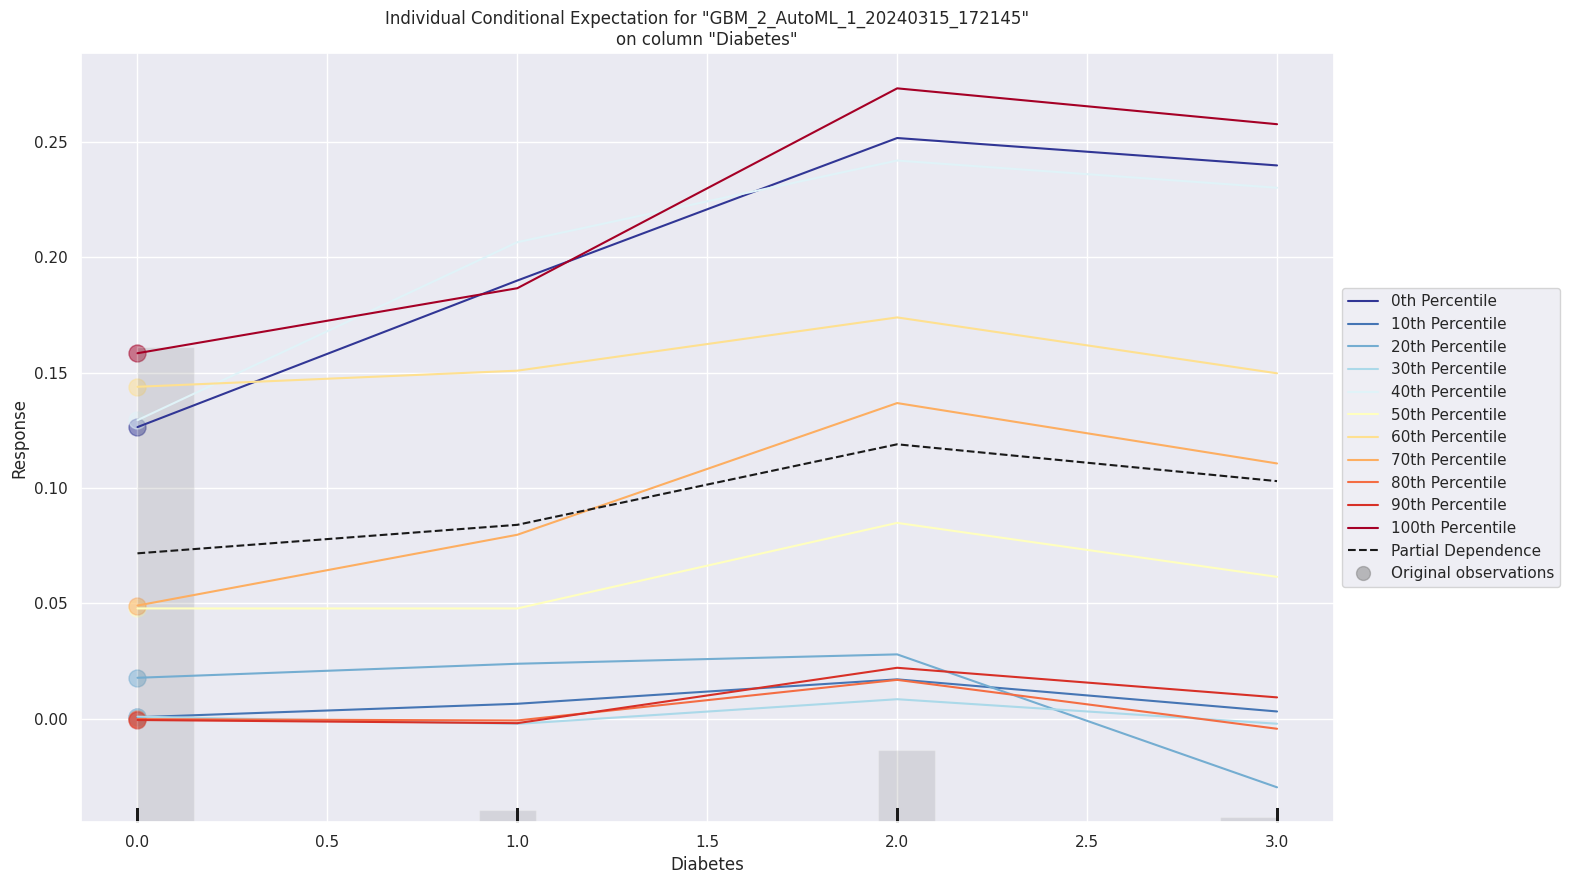

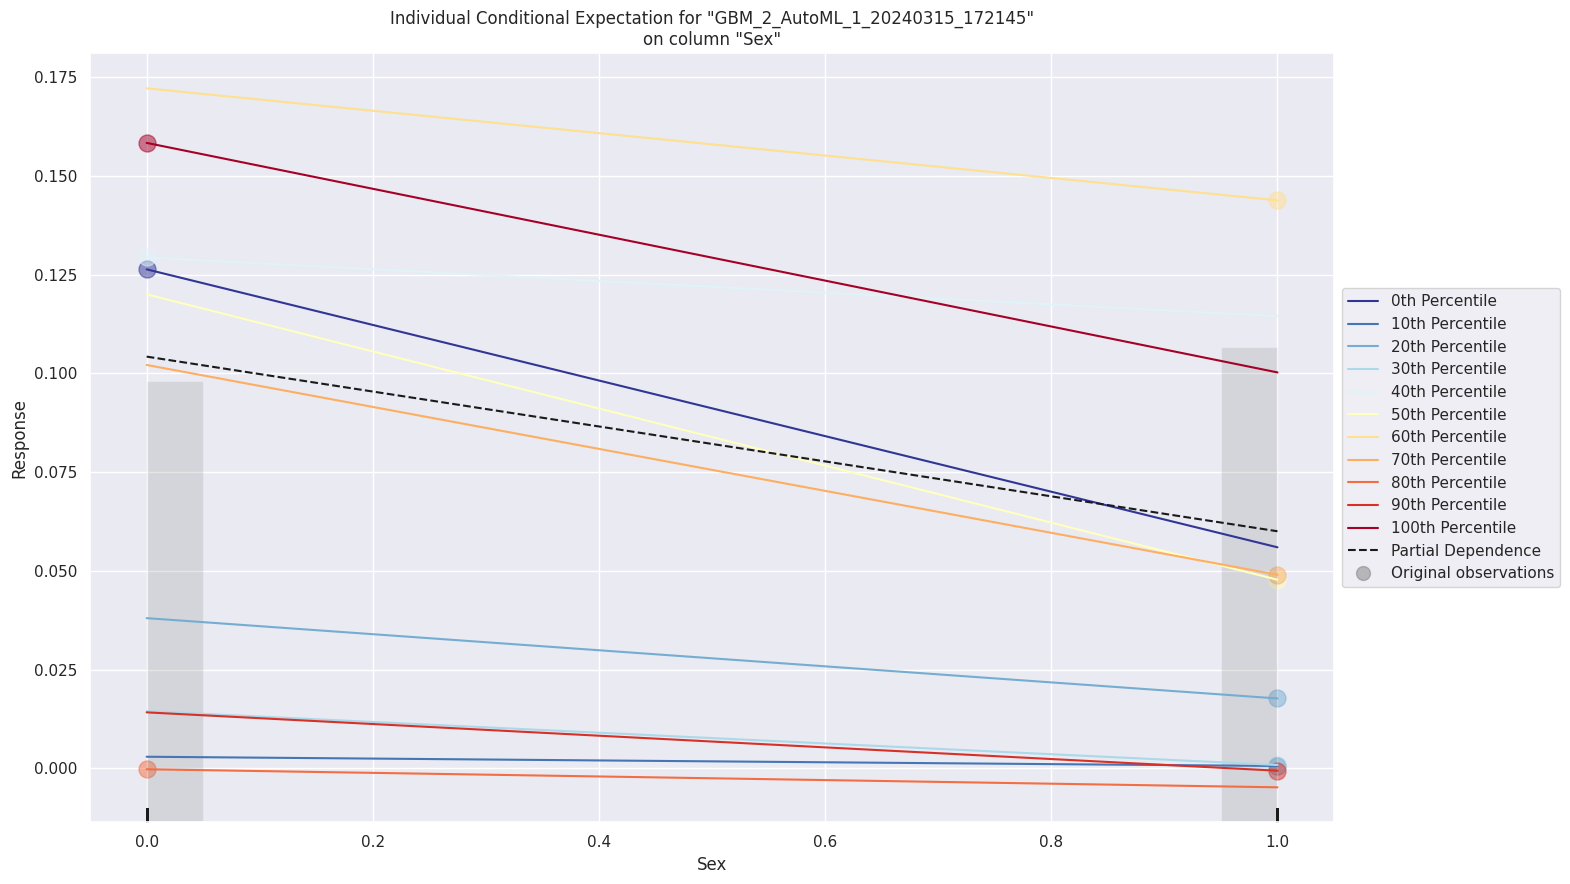

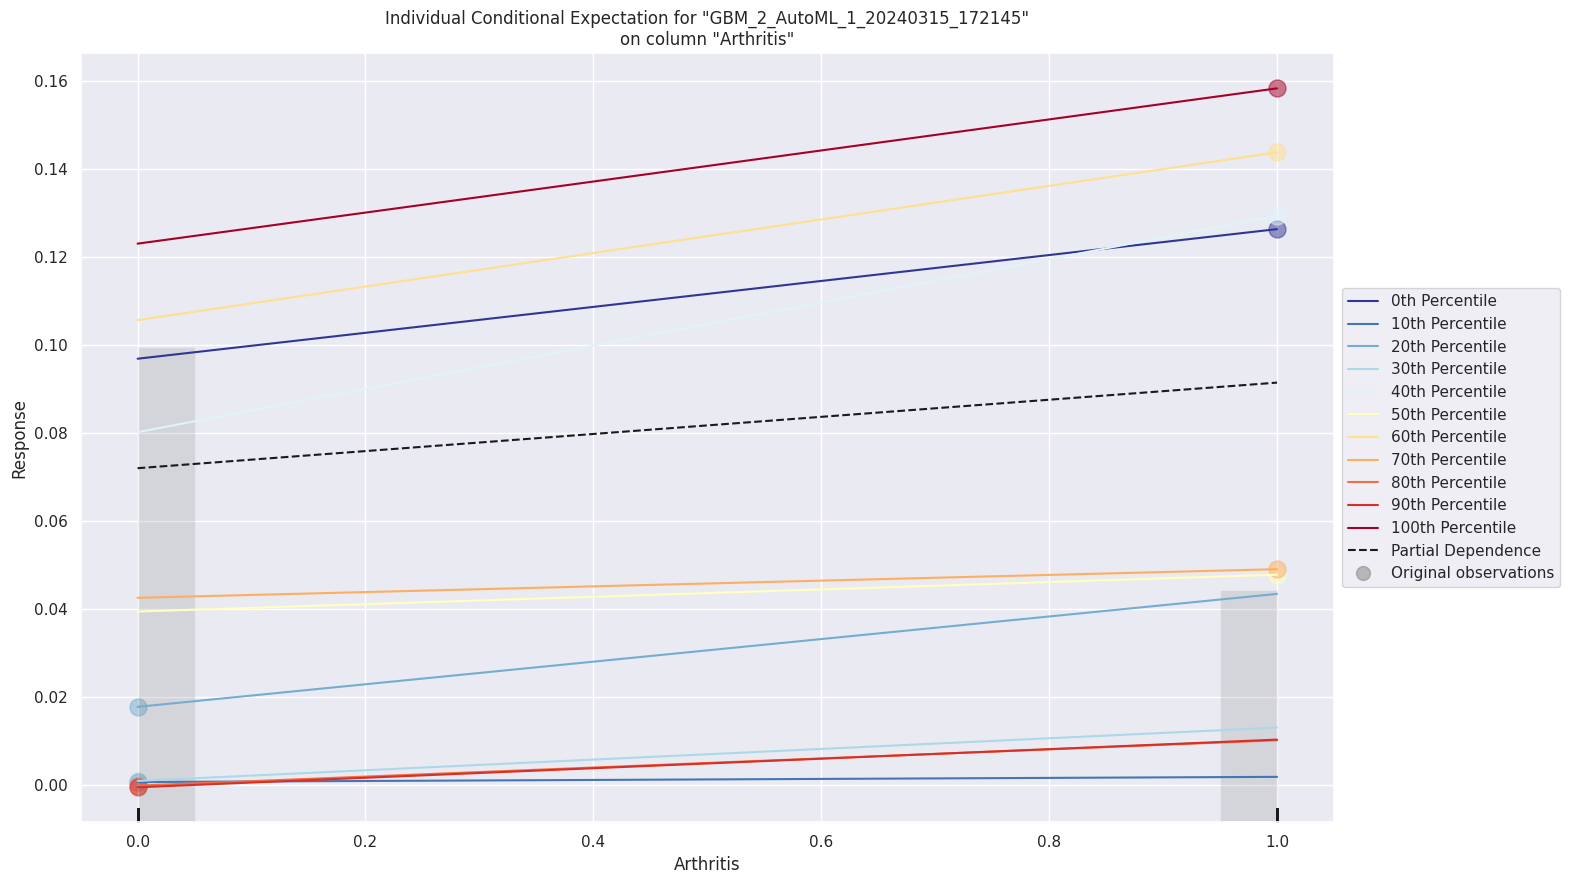

In [ ]:
exa = aml.explain(df_test)

# **AutoML Model Selection:**
* Our findings revealed that the Gradient Boosting Machine (GBM) model yielded the best performance. When interpreting the results, we observed that "age" emerged as the feature with the highest positive coefficient magnitude, indicating its significant influence on predicting heart disease risk within the GBM model.
*  This underscores the importance of age as a predictive factor in heart disease.
* Overall, our utilization of AutoML not only simplified the model selection process but also facilitated the identification of key predictors, enhancing the predictive performance of our heart disease prediction model.

# **CONCLUSION:**
In conclusion, our analysis of heart disease prediction models revealed key insights into the factors influencing heart disease risk. From our logistic regression model, we identified "Smoking History" as the most impactful feature, emphasizing its strong association with increased likelihood of heart disease. Conversely, "Fruit Consumption" had minimal impact on heart disease risk.

Furthermore, our exploration of tree-based models highlighted the significance of "age category" in predicting heart disease, while "checkup" frequency showed less influence.

 Leveraging AutoML, we determined that Gradient Boosting Machine (GBM) model performed best, with "age" emerging as the most influential predictor. These findings underscore the importance of age and smoking history in heart disease prediction, facilitating improved risk assessment and preventive measures. Overall, our approach not only streamlined model selection but also enhanced our understanding of key predictors, contributing to more accurate heart disease risk prediction.

# **REFERENCES:**
https://github.com/hyunjoonbok/Python-Projects/blob/master/H2O/Complete%20guide%20to%20Machine%20Learning%20with%20H2O%20(AutoML).ipynb

https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

https://shap-lrjball.readthedocs.io/en/latest/generated/shap.Explainer.html

https://www.kdnuggets.com/2022/04/logistic-regression-classification.html
